In [1]:
#The notebook was getting too long to scroll through lol

show_plots = True
# show_plots = False
show_prints = True
# show_prints = False

In [2]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.linear_model import LinearRegression
from scipy.stats import f

# Set the seed for reproducibility
np.random.seed(42)

## Exercises:

1. Modify the data generation function to take the slope, intercept, and sample size as arguments.
2. Modify the SS decomposition function to conduct the F-test for testing whether the true slope is zero or not.

In [3]:
def generate_data(sigma=2, beta0=3, beta1=3, sample_size=10):

    #Array w/ 1 column, the -1 means 'infer the # of rows'
    X = np.linspace(start=1, stop=sample_size, num=sample_size).reshape(-1, 1) 

    # Generate epsilon as a 1D array of N(0, sigma^2) RVs
    epsilon = sigma * np.random.randn(sample_size)
    
    # Generate y using SLR model
    y = beta0 + beta1 * X.flatten() + epsilon

    return X, y 

In [4]:
def ss_decomp(X, y):

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of y
    y_mean = np.mean(y)

    #calculate SS quantities
    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)

    if show_prints:
        # Output the sum of squares decomposition
        print(f"SST (Total Sum of Squares): {SST}")
        print(f"SSR (Regression Sum of Squares): {SSR}")
        print(f"SSE (Error Sum of Squares): {SSE}")
        print(f"SST = SSR + SSE: {np.isclose(SST, SSR + SSE)}")
        print(f"Coefficient of Determination, R^2 is: {np.round(1-SSE/SST, 4)}")
    
    #F Test
    n = len(y)
    MSR = SSR / 1
    MSE = SSE / (n - 2)
    F_stat = MSR / MSE

    #make a ggplot
    df = pd.DataFrame({
        'X': X.flatten(),
        'y': y,
        'predicted': y_pred,
        'y_mean':  y_mean
    })

    gg1 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        #geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', yend = 'y_mean'), color = "black") + #SST components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    gg2 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(xend = 'X', y = 'predicted', yend = 'y_mean'), color = "blue", linetype = "dashed") + #SSR components 
        geom_segment(aes(xend = 'X',  yend = 'predicted'), color = "red", linetype = "dashed") + #SSE components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    return gg1, gg2, F_stat

In [5]:
def hypothesis_test(F_stat, n, alpha=0.05):

    # Degrees of freedom
    dfn = 1
    dfd = n - 2
    # Calculate the p-value using the cumulative distribution function (CDF) of the F-distribution
    p_value = 1 - f.cdf(F_stat, dfn, dfd)

    # Decision rule

    if p_value < alpha:
        decision = f"Reject the null hypothesis at alpha = {alpha}. There is evidence of a linear relationship."
    else:
        decision = f"Fail to reject the null hypothesis at alpha = {alpha}. No evidence of a linear relationship."

    if show_prints:
        print(f"F-statistic: {F_stat}")
        print(f"p-value: {p_value}")
        print(decision)

    return p_value, decision


3. Holding the intercept, sample size, and error variance constant, compare how different values of the slope affect:
   
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?



<div style="background-color: #d0f0c0; color: #000000; padding: 10px; border-radius: 5px;">
As the slope increases, the model generally explains a larger portion of the variance in resulting in higher SSR, higher r2, and increased F-statistic. The hypothesis test becomes more likely to reject the null hypothesis at higher slopes and more likely to show evidence of a linear relationship.

When the slope is small, the effect of the random error is more pronounced because the changes in y due to X are subtle, making it harder for the model to distinguish the signal (the linear relationship) from the noise (random error).
</div>


alpha: 0.05
sigma: 5
Slope: 0.5
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 135.3953
SSR (Regression Sum of Squares): 17.8768
SSE (Error Sum of Squares): 117.5185
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.132
F-statistic: 1.2169522245433697
p-value: 0.3020351019555285
Fail to reject the null hypothesis at alpha = 0.05. No evidence of a linear relationship.


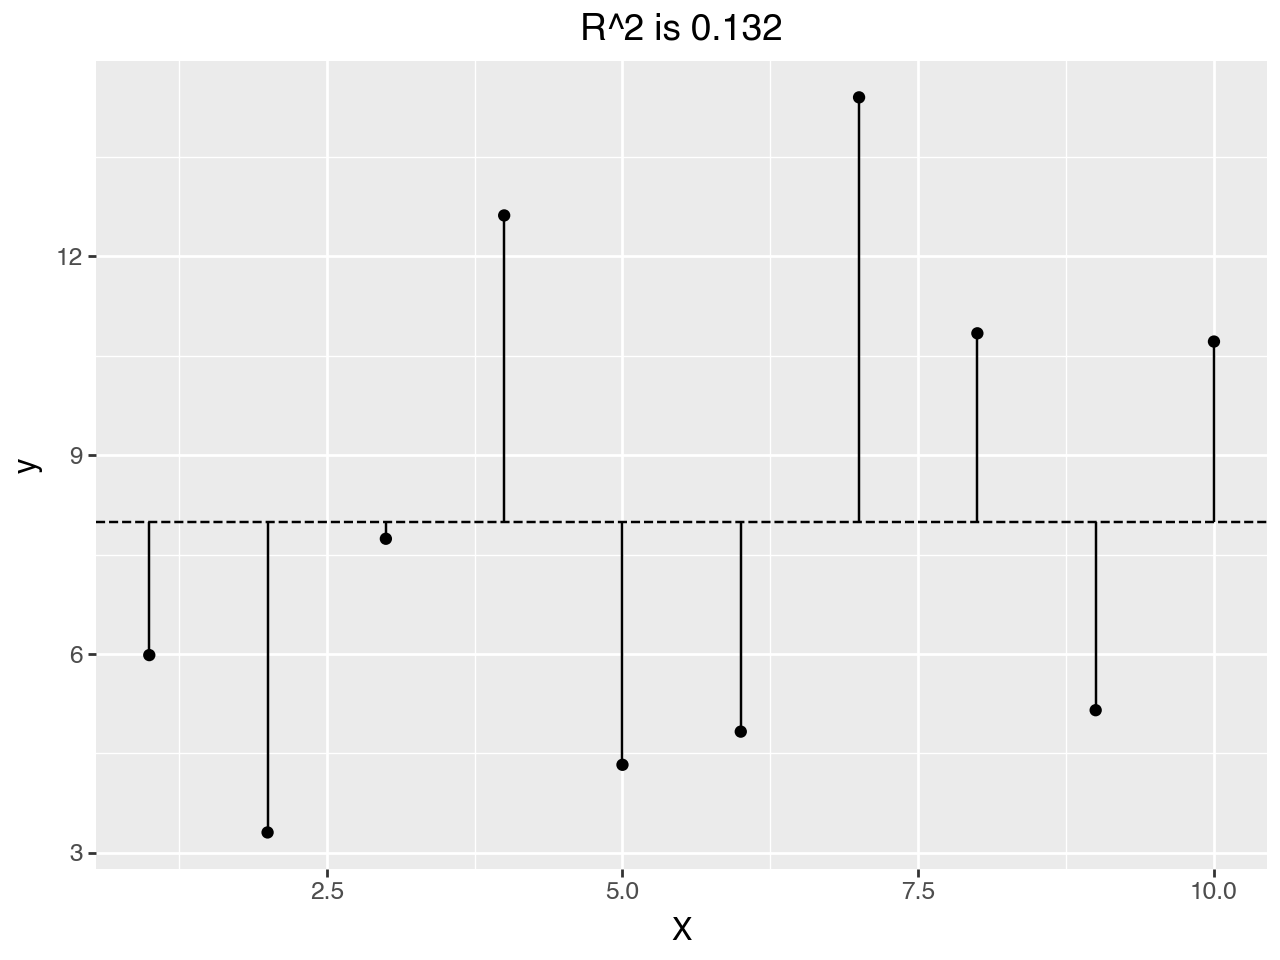

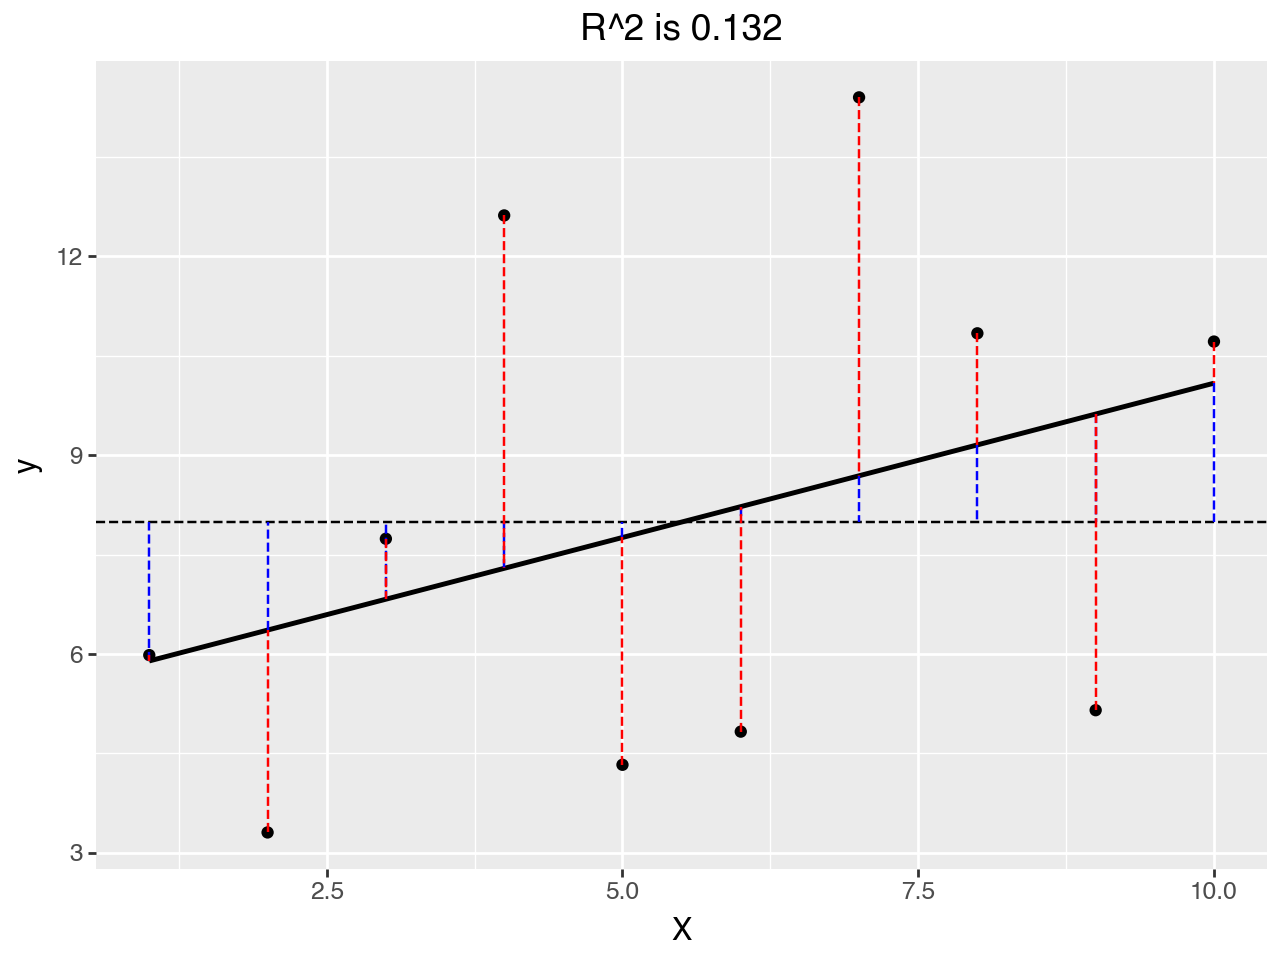

alpha: 0.05
sigma: 5
Slope: 1.0
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 173.8128
SSR (Regression Sum of Squares): 49.6073
SSE (Error Sum of Squares): 124.2056
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.2854
F-statistic: 3.1951731644949986
p-value: 0.111664152646617
Fail to reject the null hypothesis at alpha = 0.05. No evidence of a linear relationship.


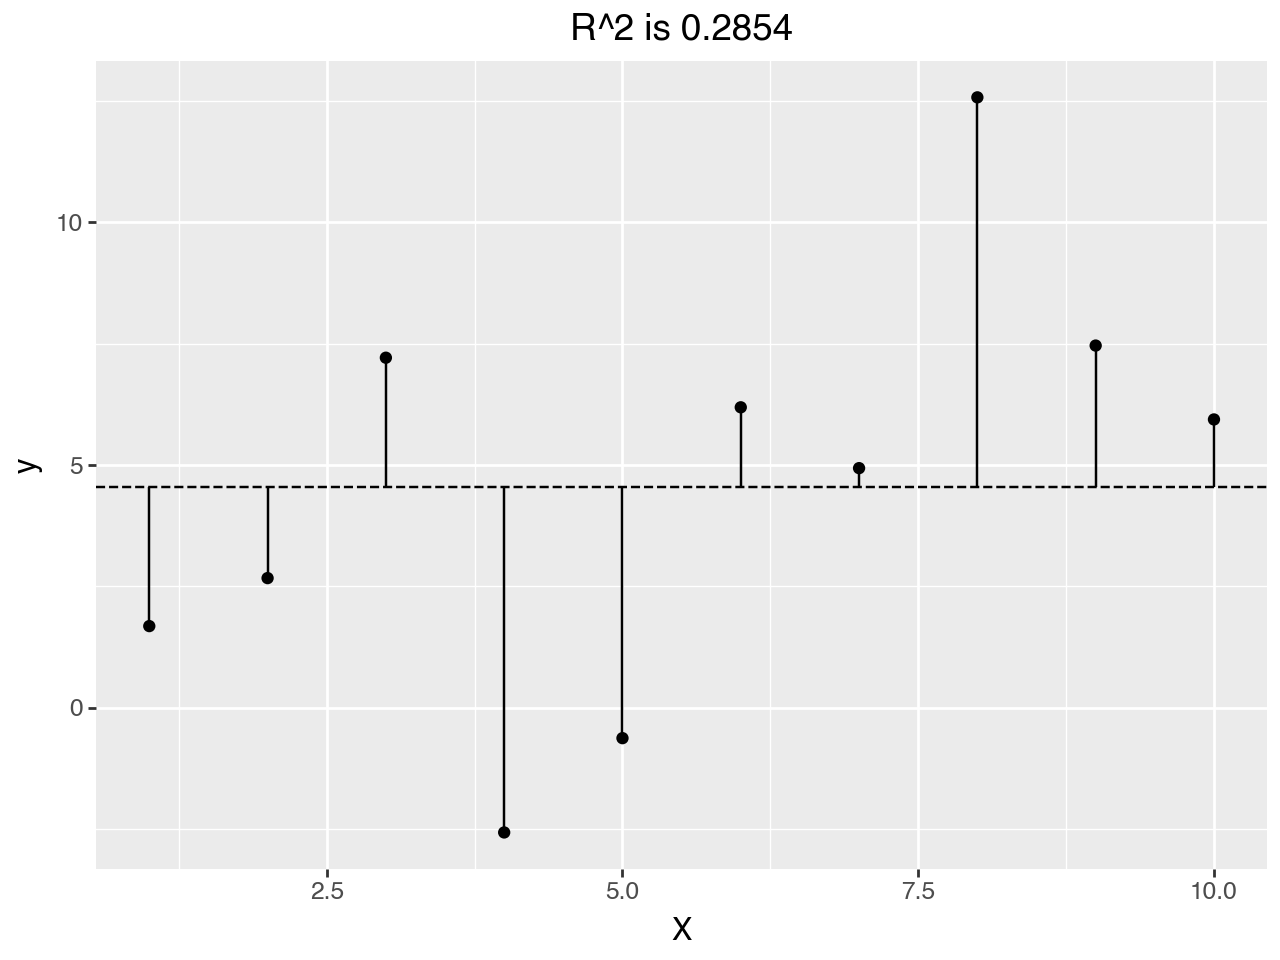

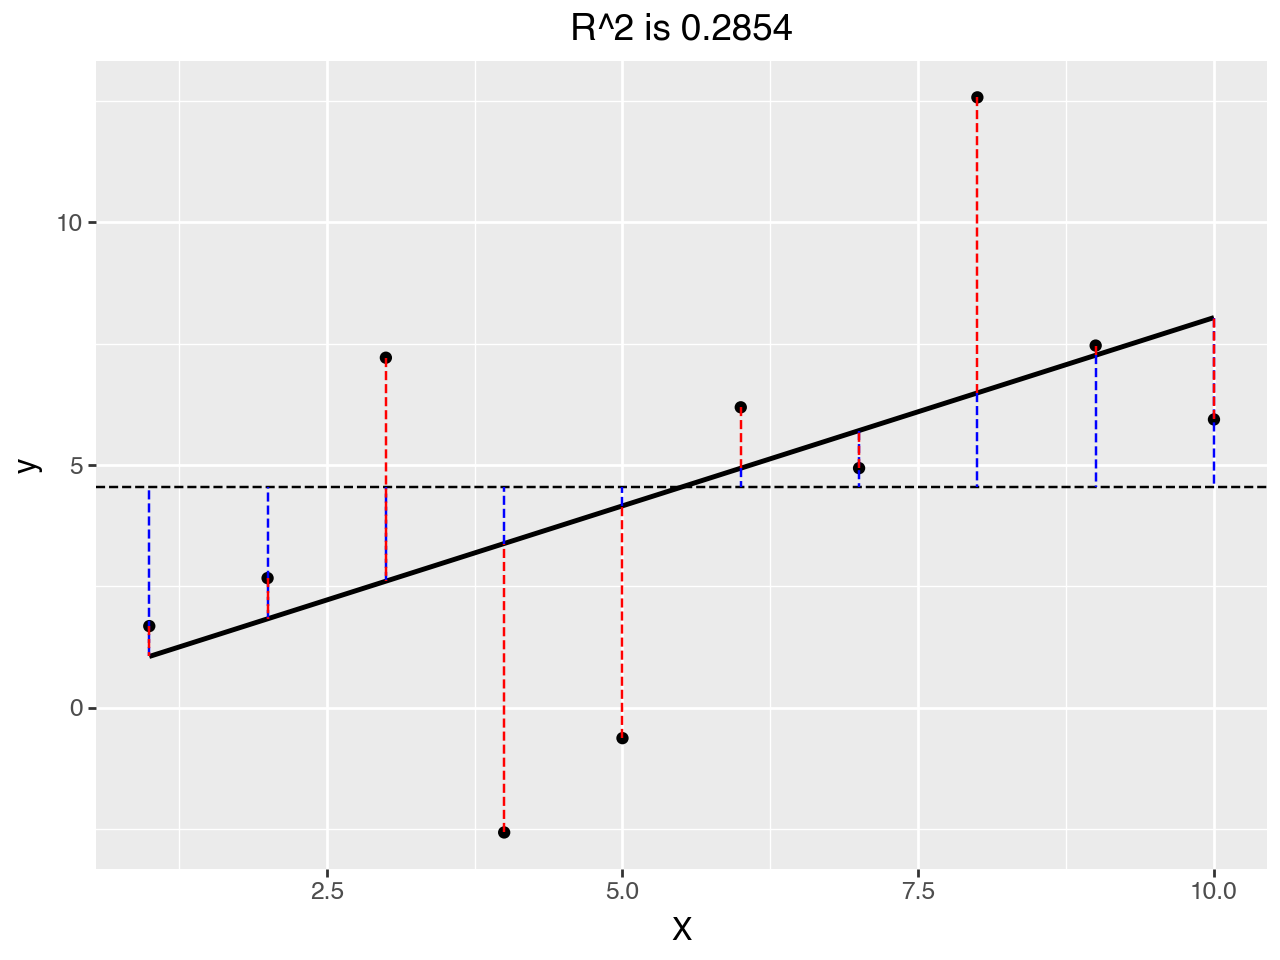

alpha: 0.05
sigma: 5
Slope: 1.5
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 219.0014
SSR (Regression Sum of Squares): 87.9744
SSE (Error Sum of Squares): 131.027
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.4017
F-statistic: 5.371375365382708
p-value: 0.04910130659928624
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


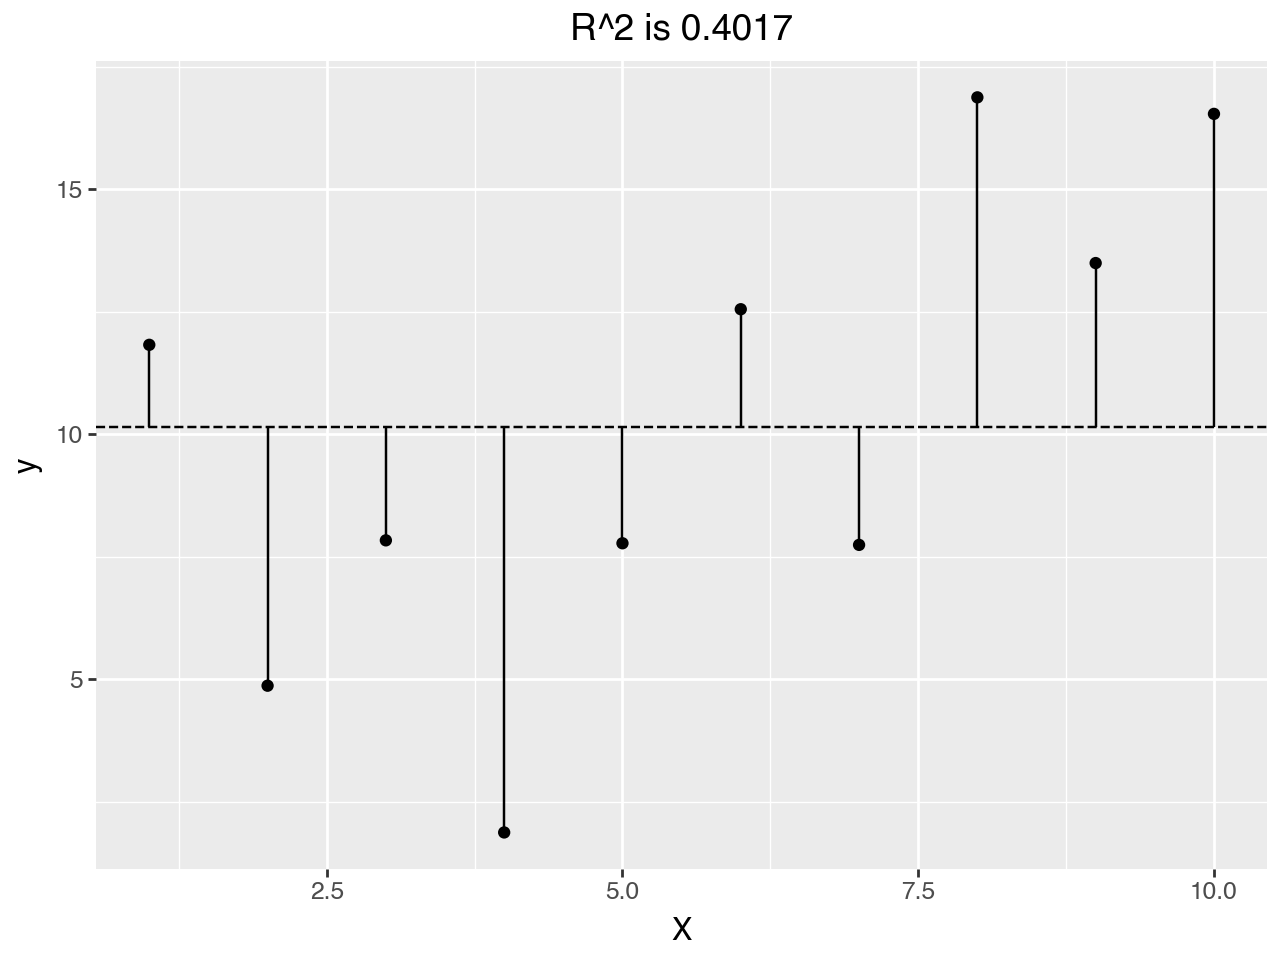

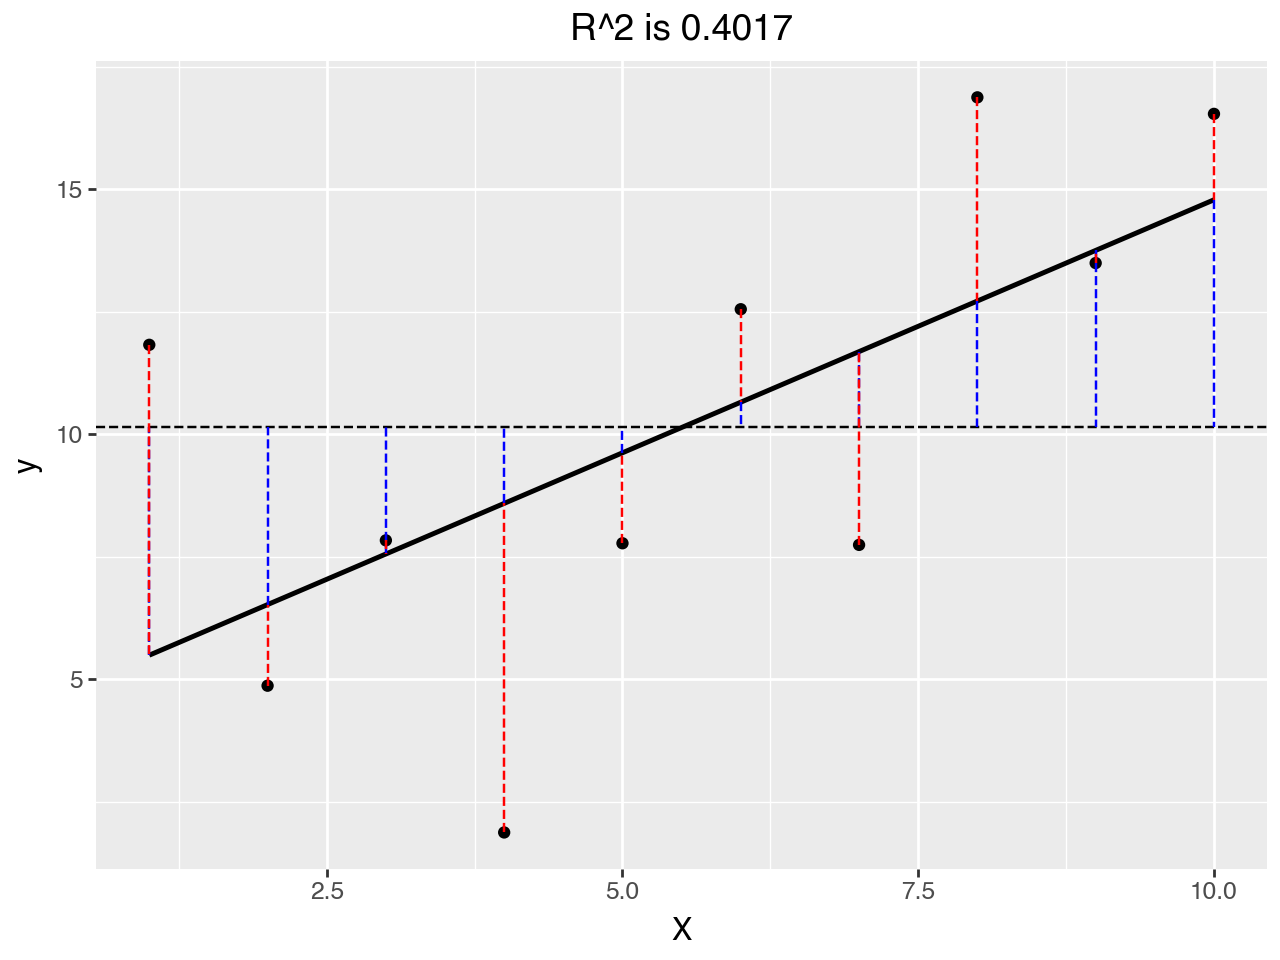

alpha: 0.05
sigma: 5
Slope: 2.0
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 394.5948
SSR (Regression Sum of Squares): 139.7458
SSE (Error Sum of Squares): 254.849
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.3542
F-statistic: 4.386779622443094
p-value: 0.06953367957855239
Fail to reject the null hypothesis at alpha = 0.05. No evidence of a linear relationship.


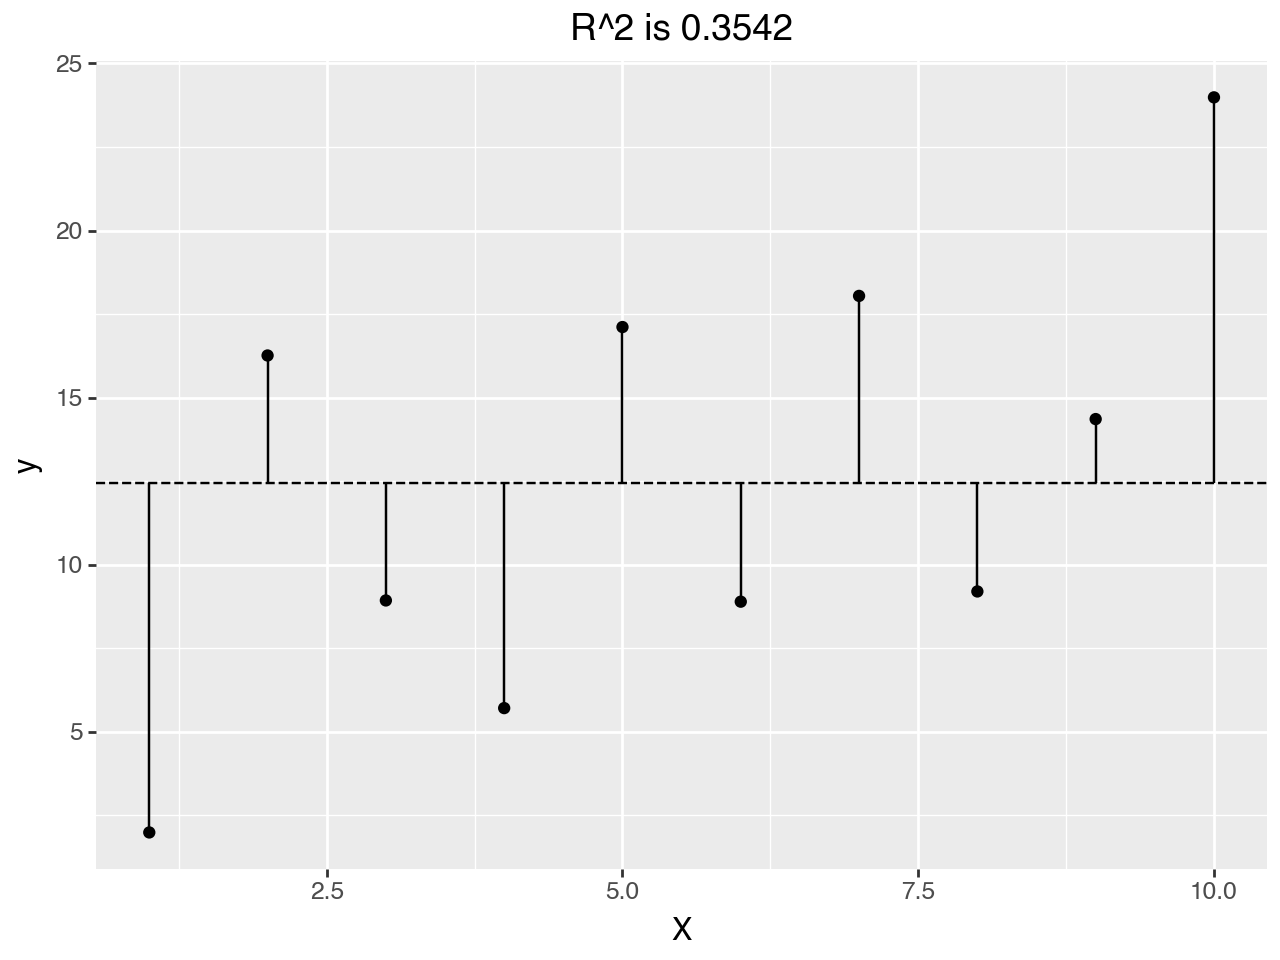

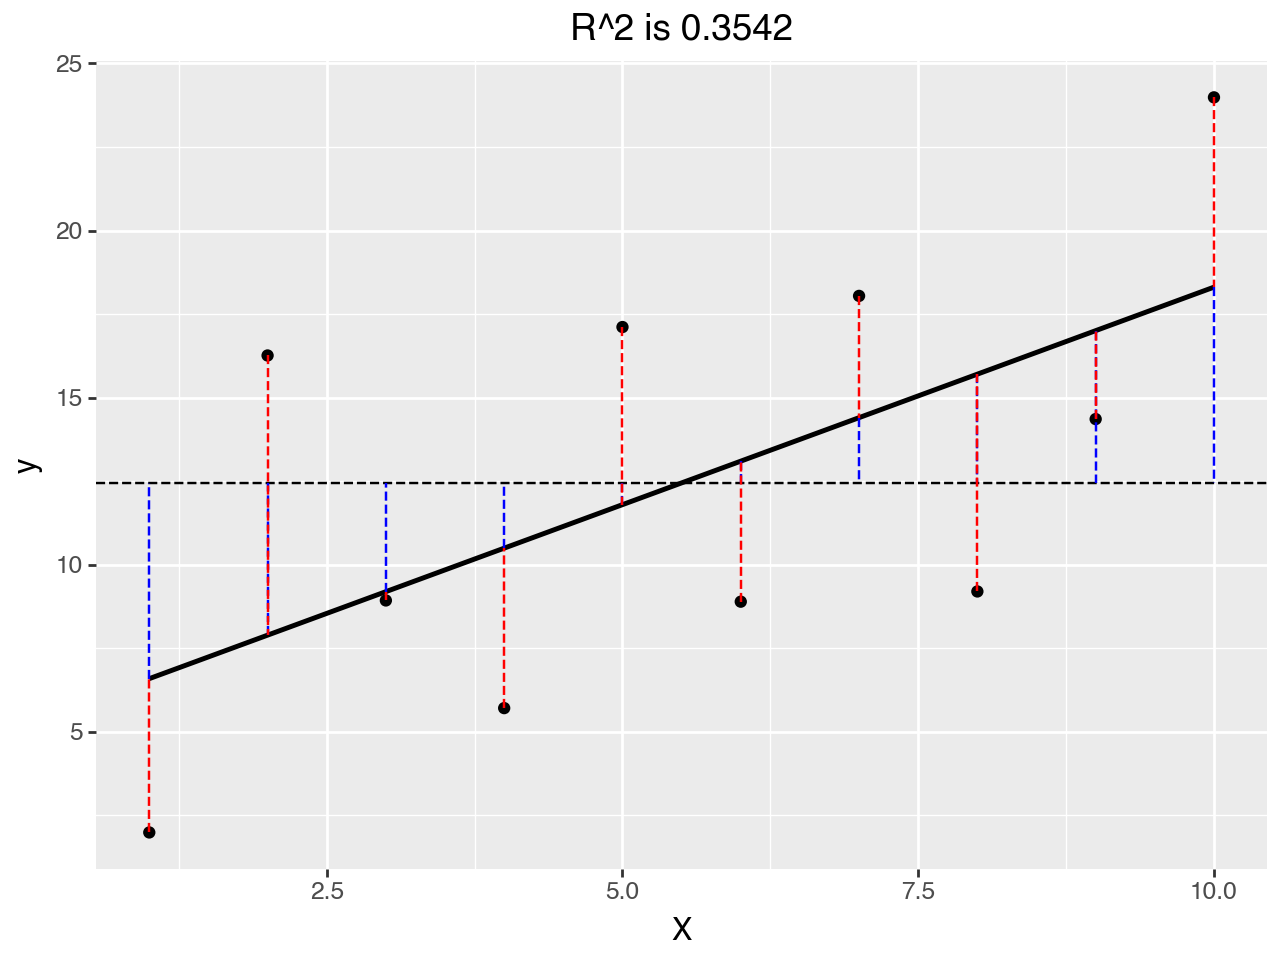

alpha: 0.05
sigma: 5
Slope: 2.5
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 508.5722
SSR (Regression Sum of Squares): 343.4964
SSE (Error Sum of Squares): 165.0758
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.6754
F-statistic: 16.646723505201855
p-value: 0.0035339489543932956
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


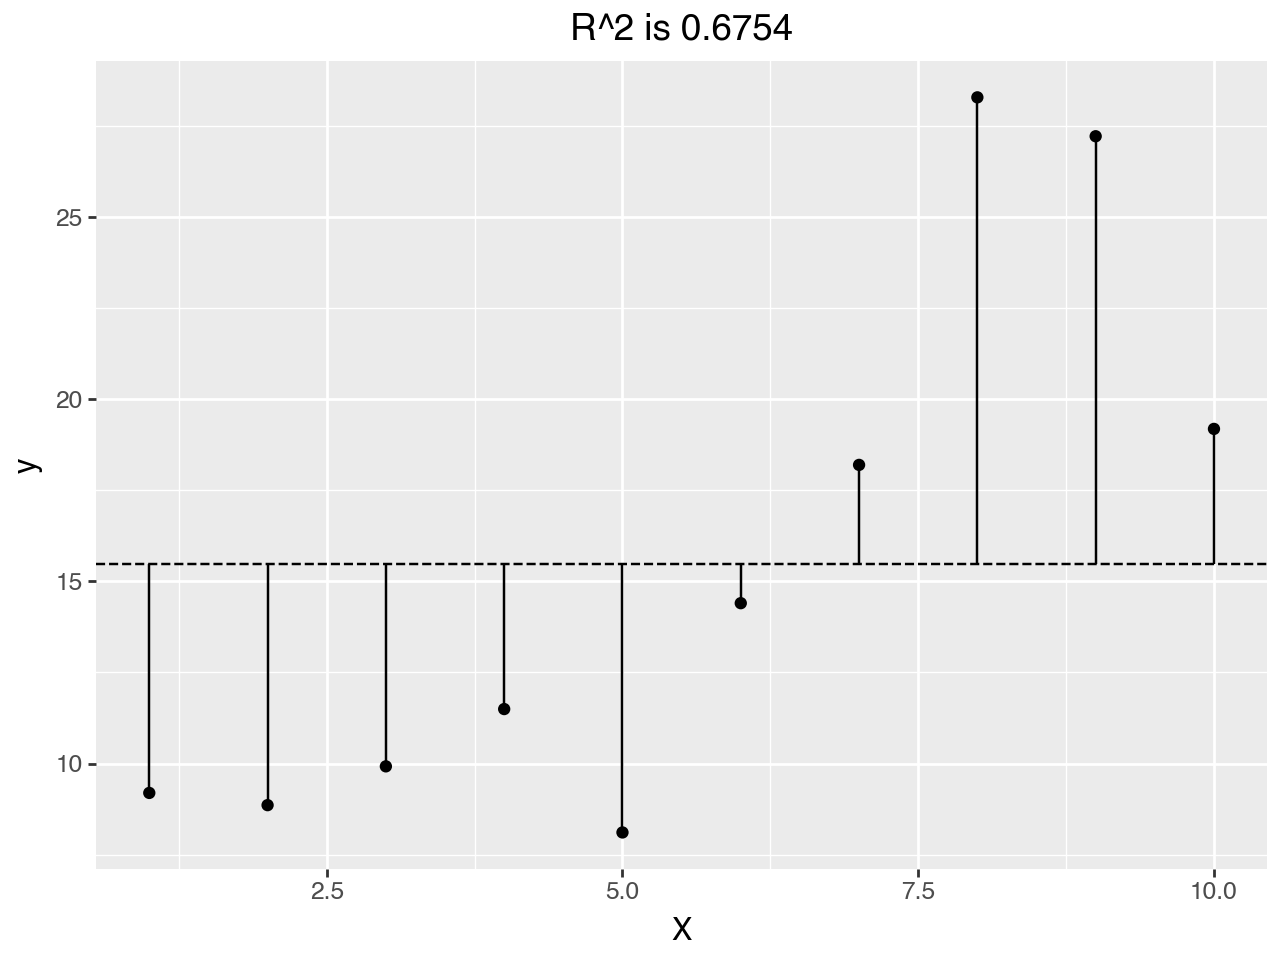

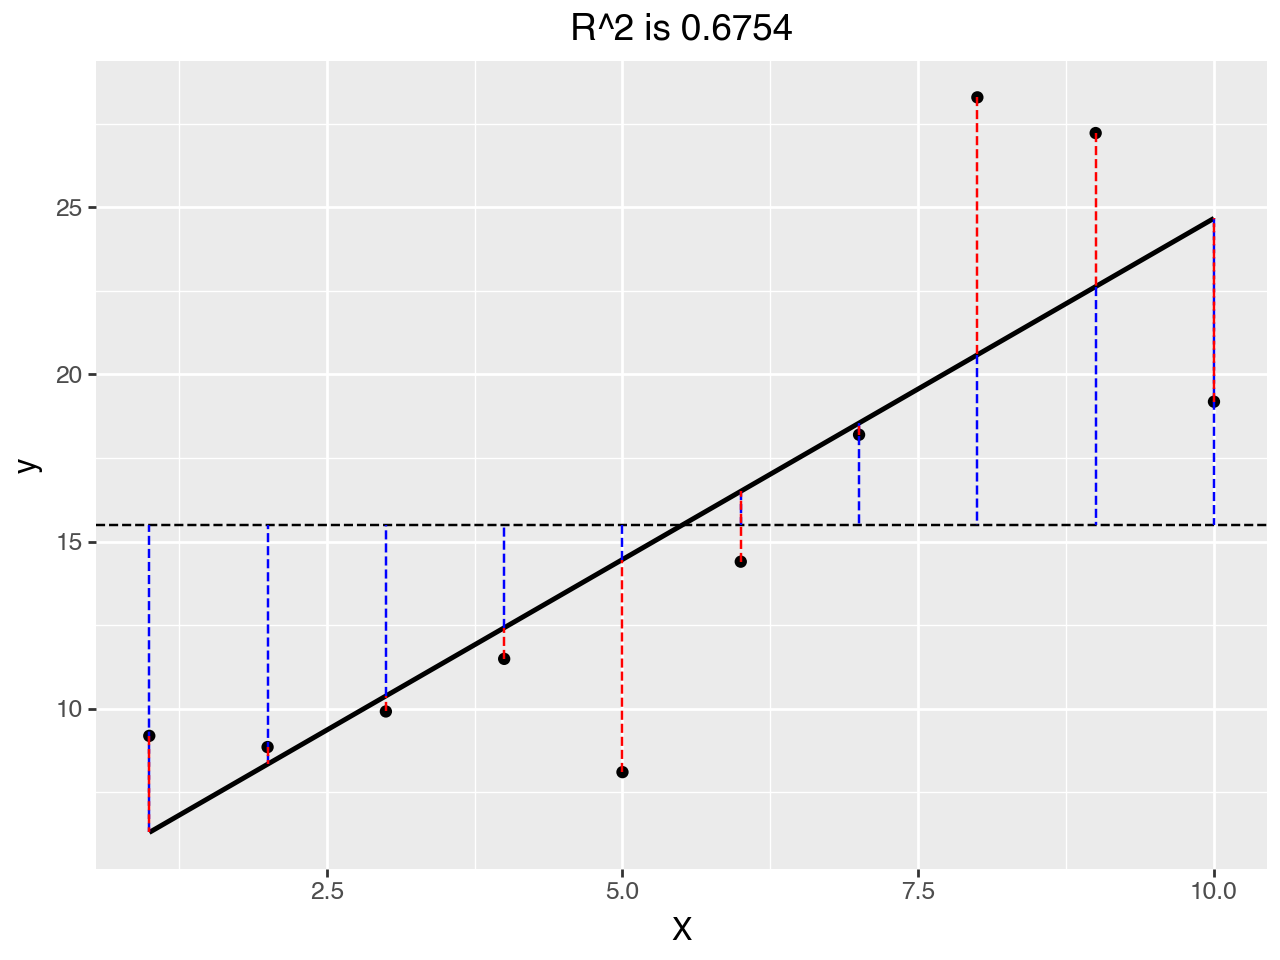

alpha: 0.05
sigma: 5
Slope: 3.0
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 978.4429
SSR (Regression Sum of Squares): 871.6292
SSE (Error Sum of Squares): 106.8137
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8908
F-statistic: 65.28220256390333
p-value: 4.06564141407495e-05
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


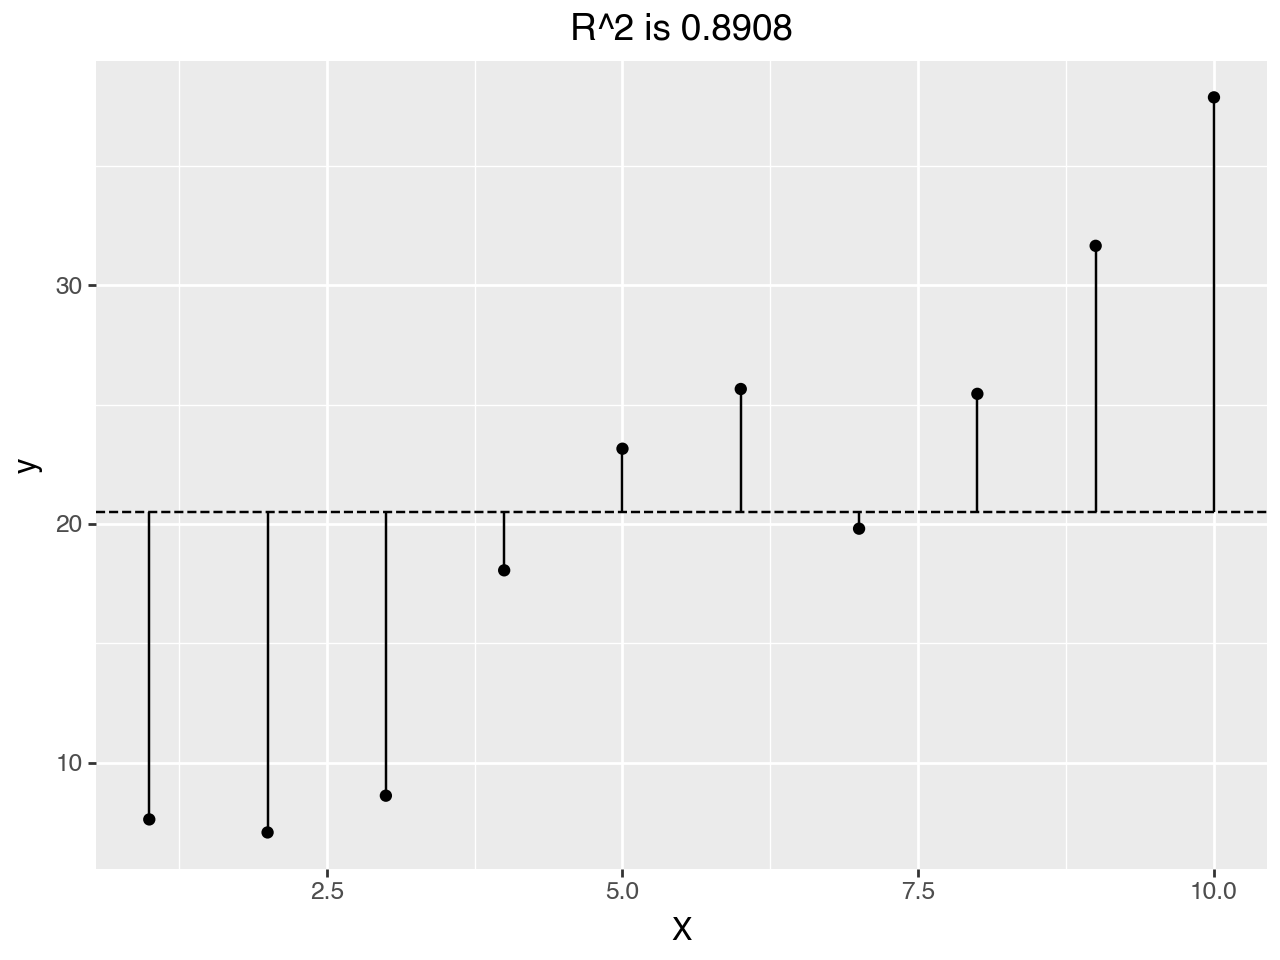

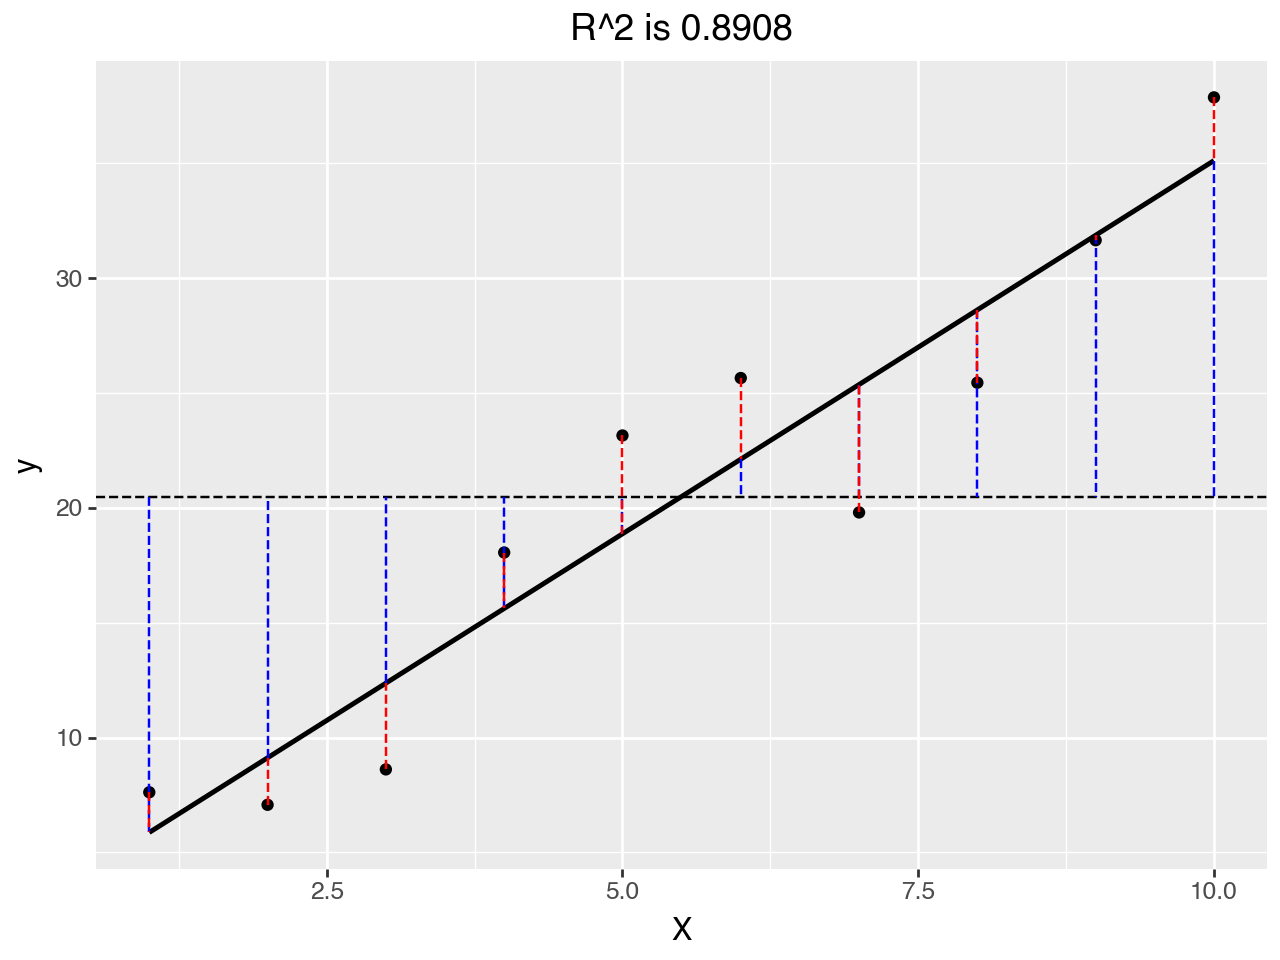

alpha: 0.05
sigma: 5
Slope: 3.5
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 1479.0686
SSR (Regression Sum of Squares): 1326.0709
SSE (Error Sum of Squares): 152.9977
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8966
F-statistic: 69.33808286006914
p-value: 3.269307575870517e-05
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


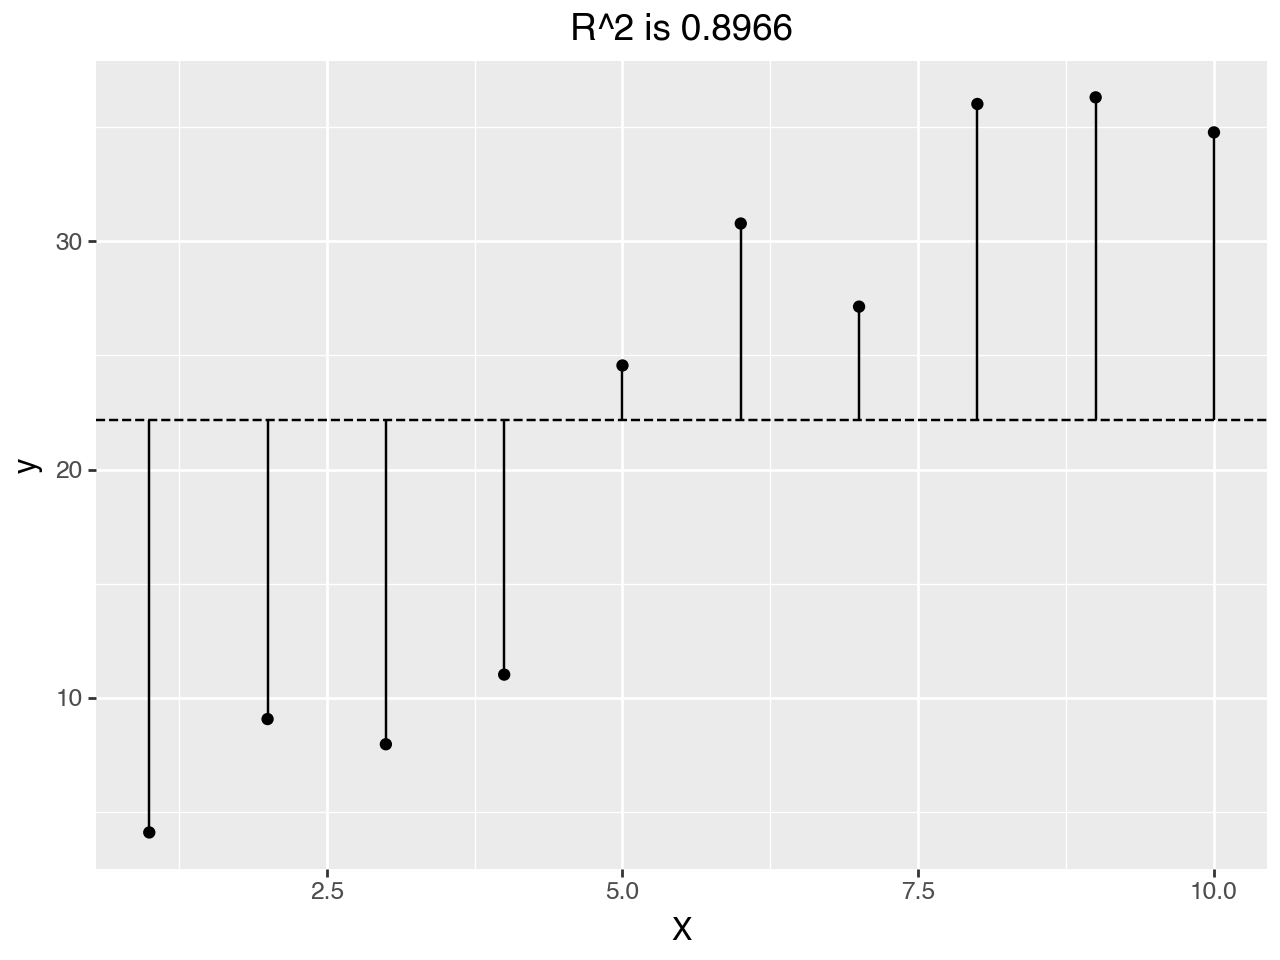

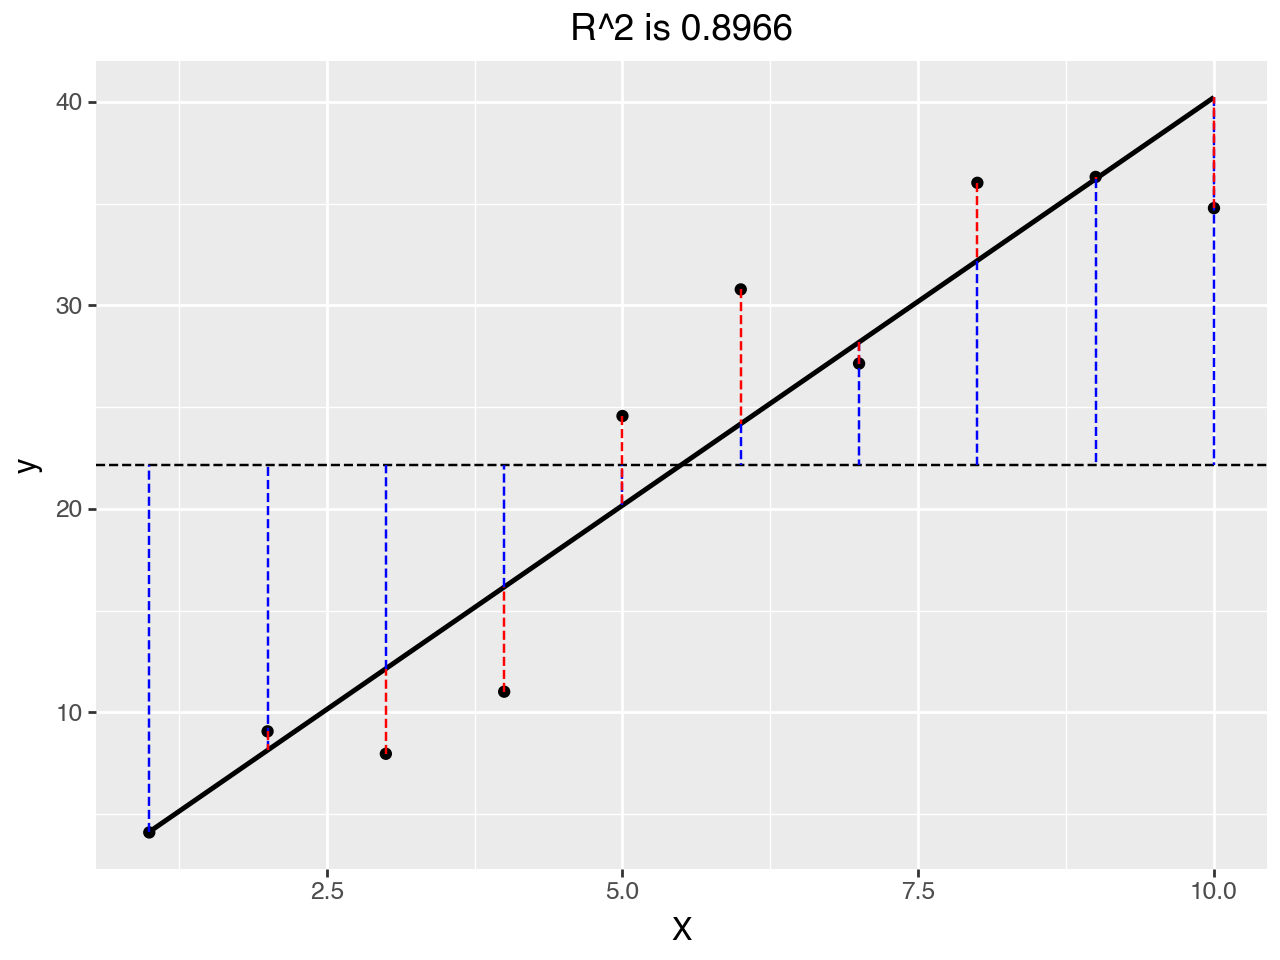

alpha: 0.05
sigma: 5
Slope: 4.0
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 1061.4966
SSR (Regression Sum of Squares): 733.9499
SSE (Error Sum of Squares): 327.5467
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.6914
F-statistic: 17.925991011358075
p-value: 0.002861088059512573
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


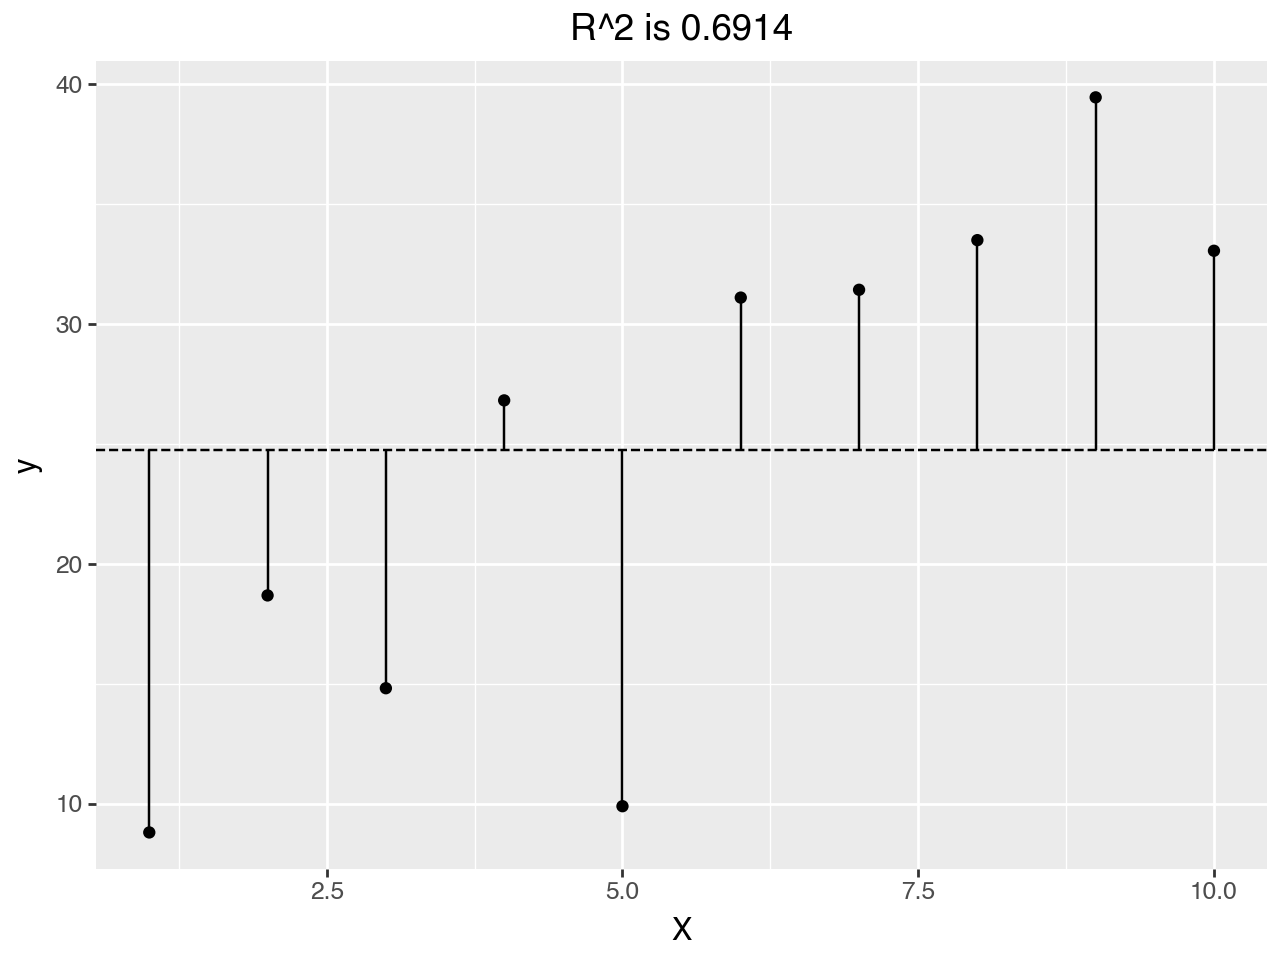

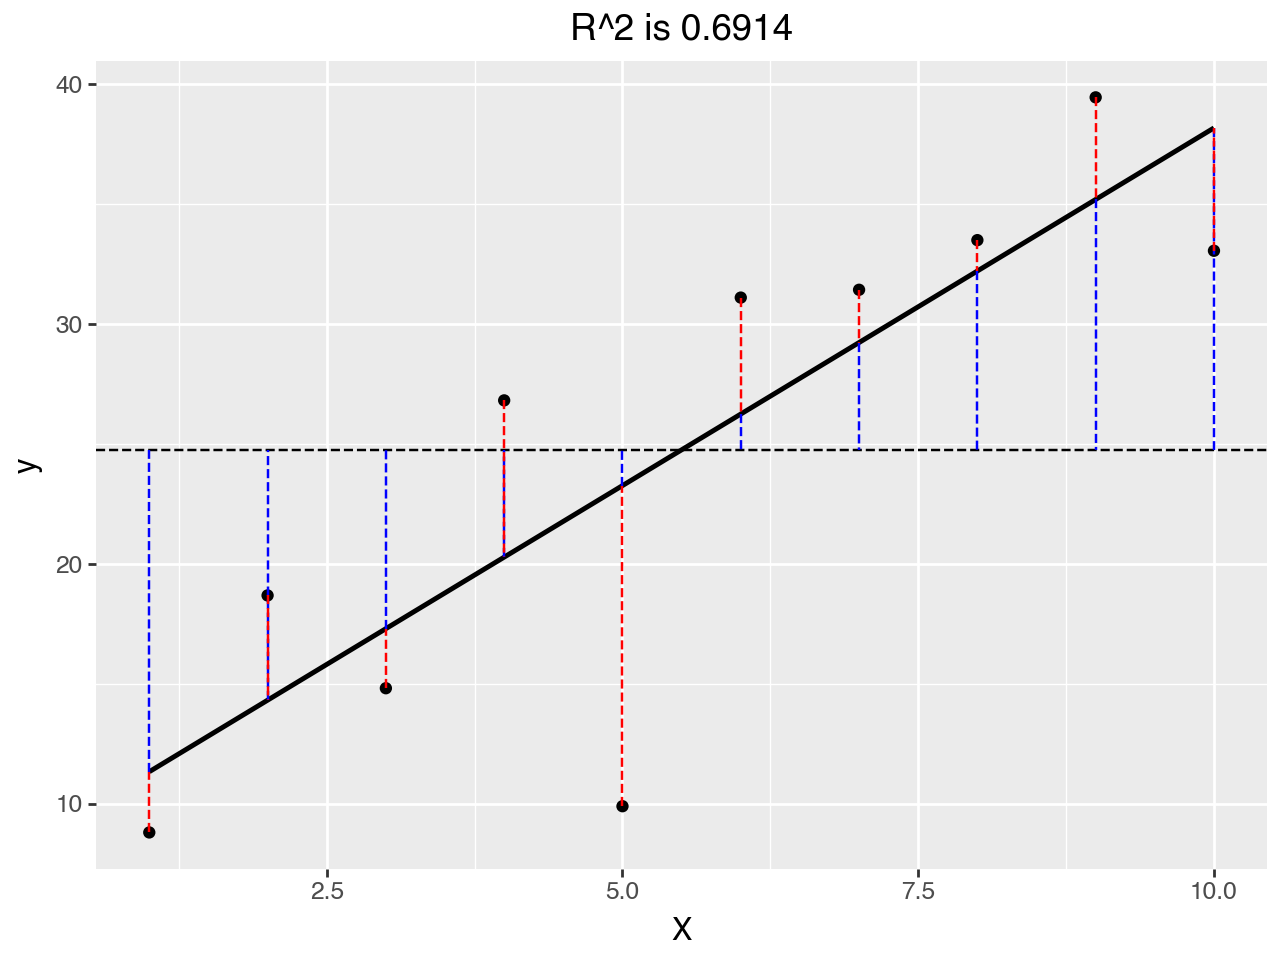

alpha: 0.05
sigma: 5
Slope: 4.5
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 1776.7885
SSR (Regression Sum of Squares): 1653.8012
SSE (Error Sum of Squares): 122.9873
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9308
F-statistic: 107.57541307110571
p-value: 6.458766648842484e-06
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


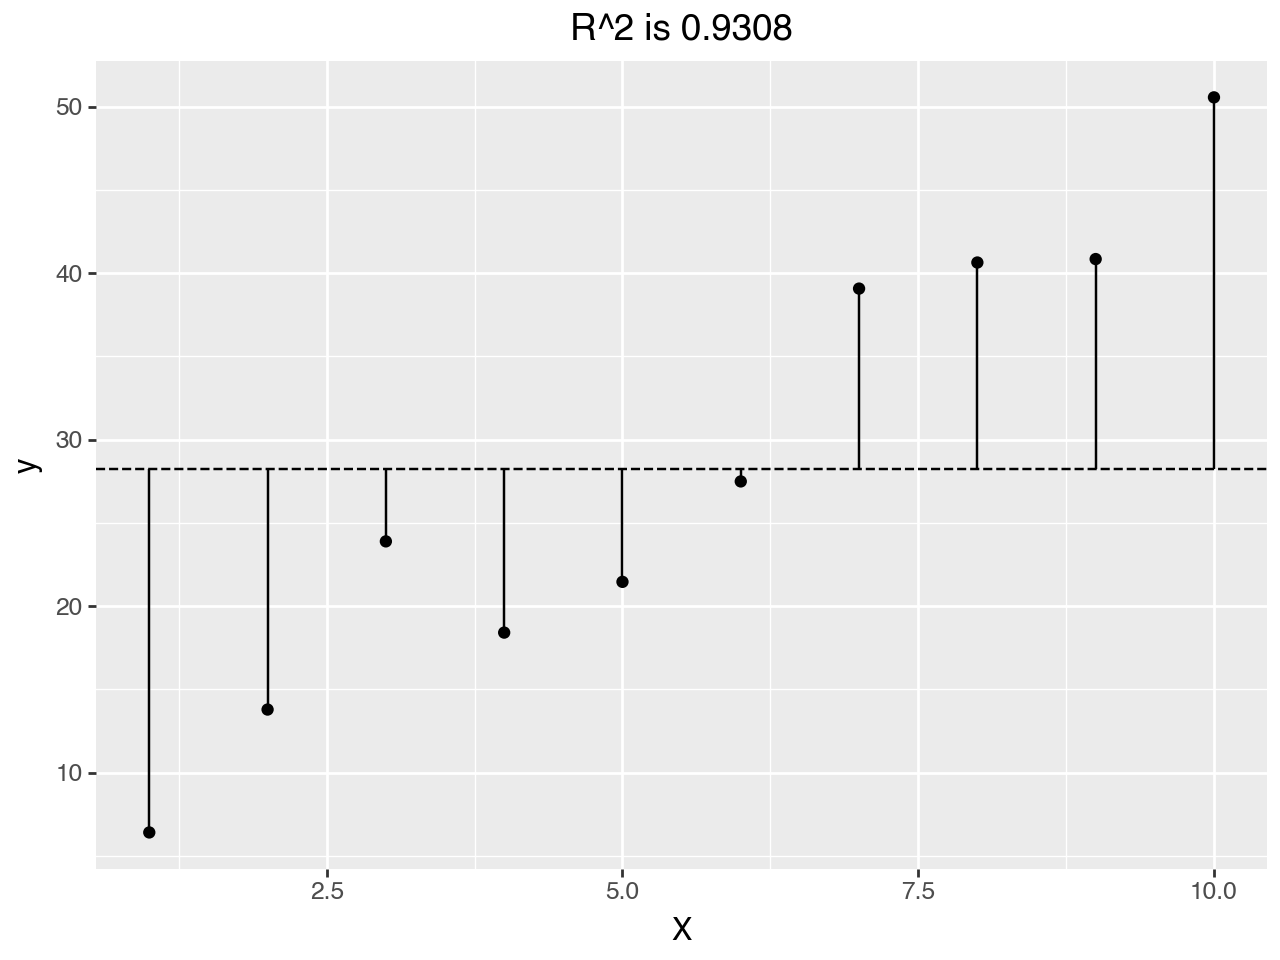

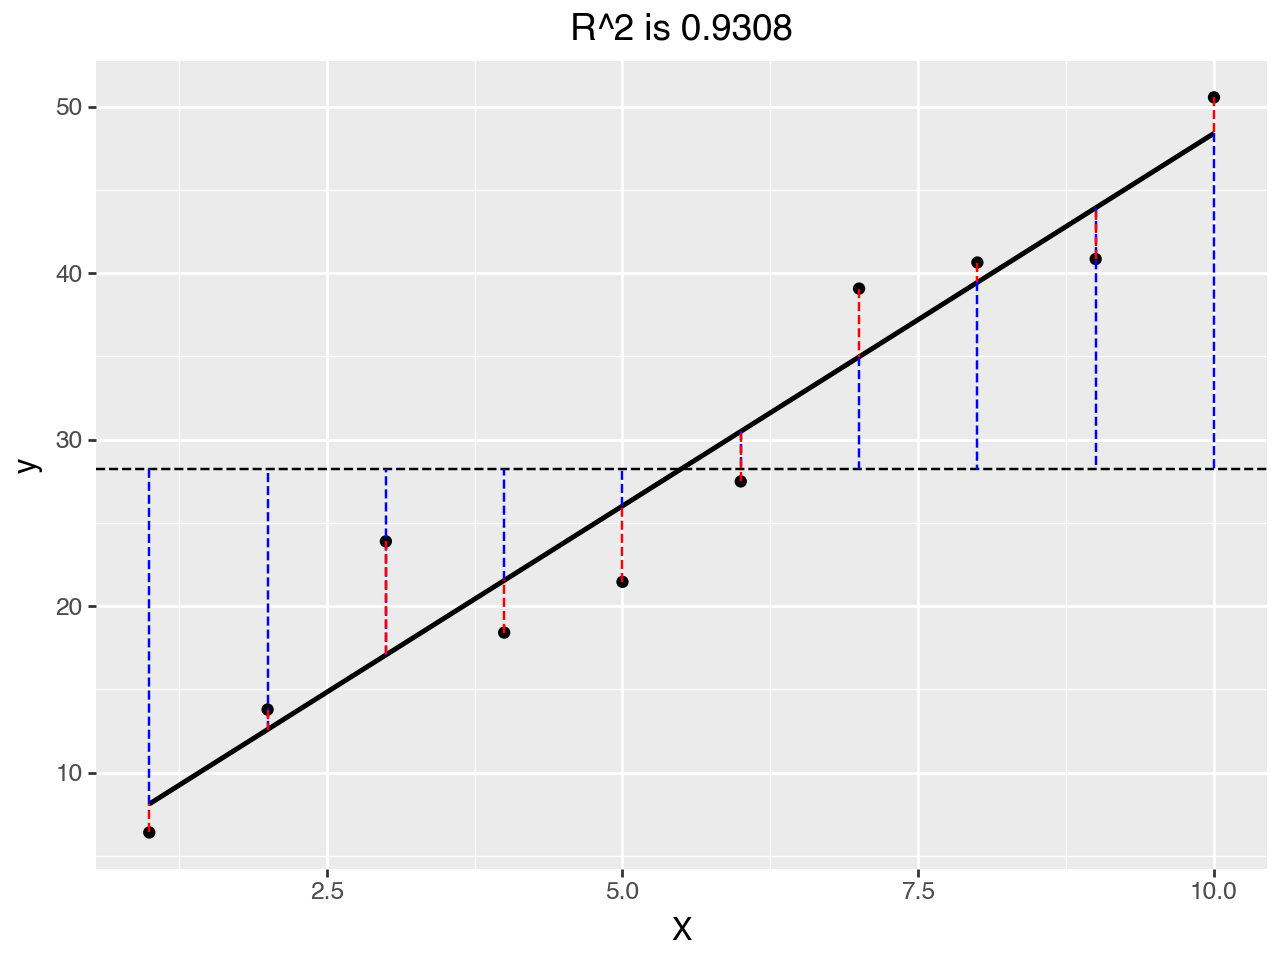

alpha: 0.05
sigma: 5
Slope: 5.0
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 2055.4414
SSR (Regression Sum of Squares): 1960.9268
SSE (Error Sum of Squares): 94.5146
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.954
F-statistic: 165.9787419086575
p-value: 1.2456090080492643e-06
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


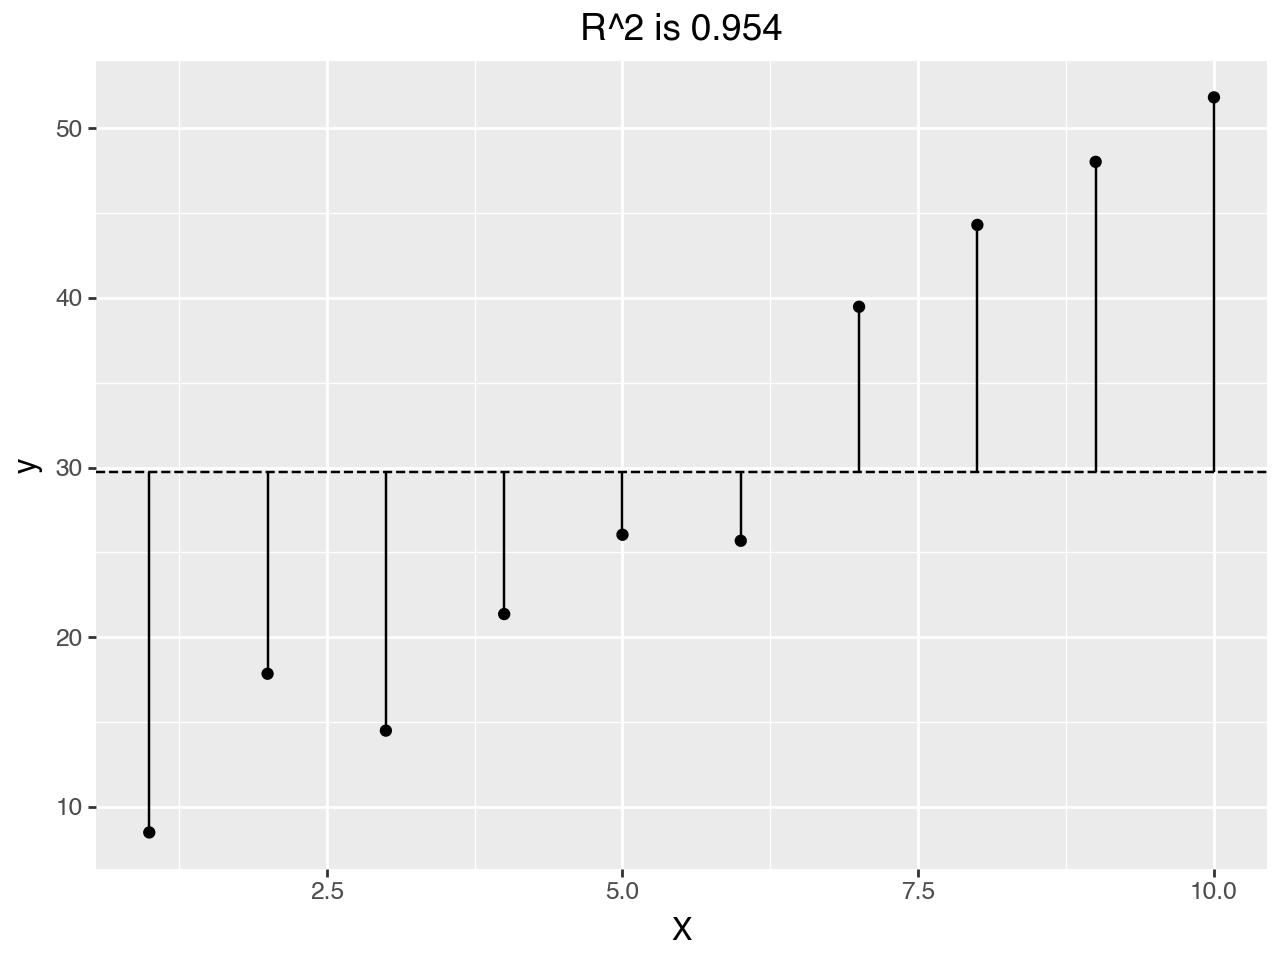

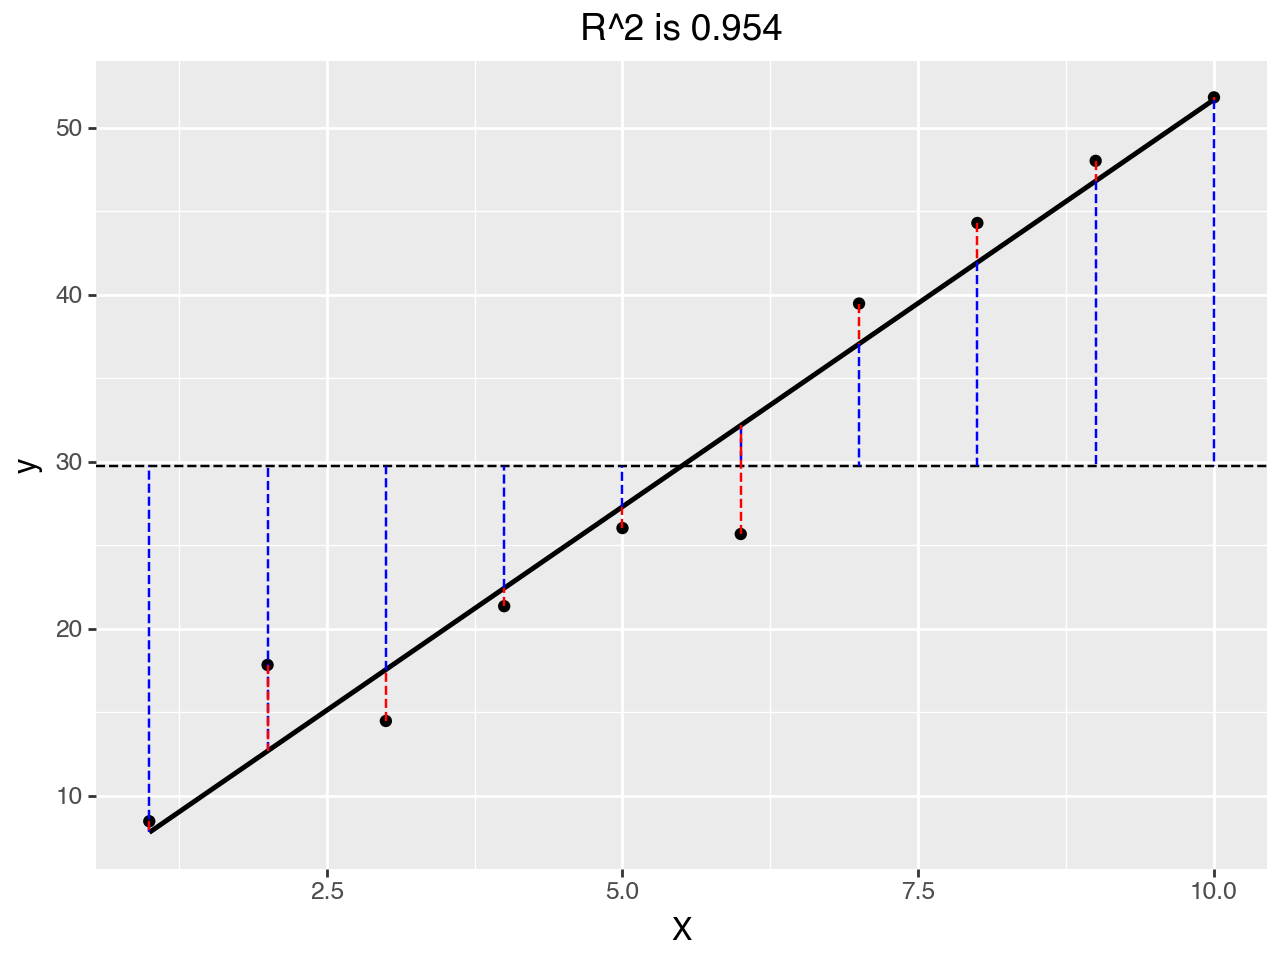

alpha: 0.05
sigma: 5
Slope: 5.5
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 3435.6842
SSR (Regression Sum of Squares): 3326.0627
SSE (Error Sum of Squares): 109.6214
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9681
F-statistic: 242.73090473210524
p-value: 2.870819704181571e-07
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


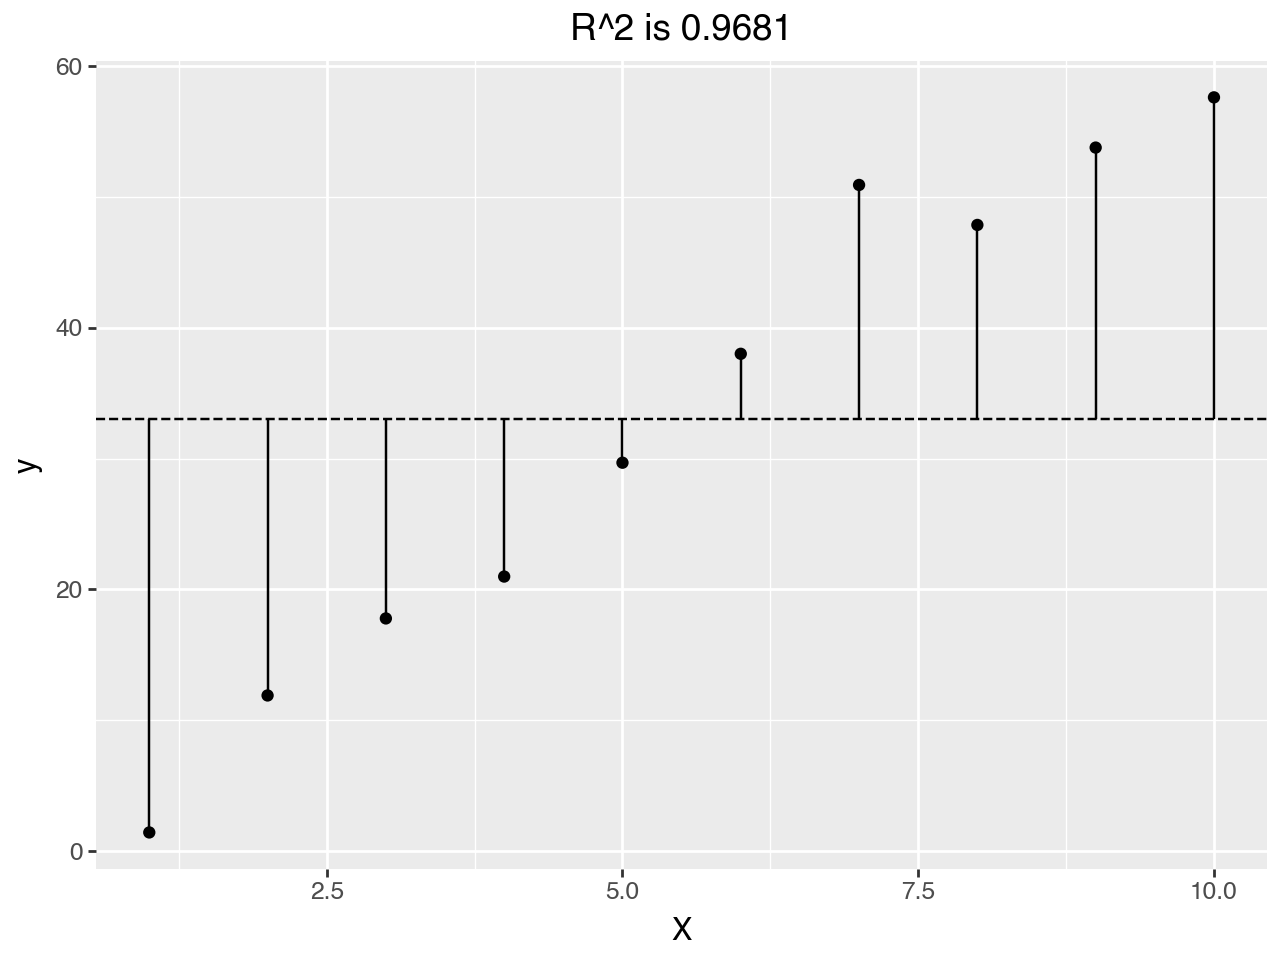

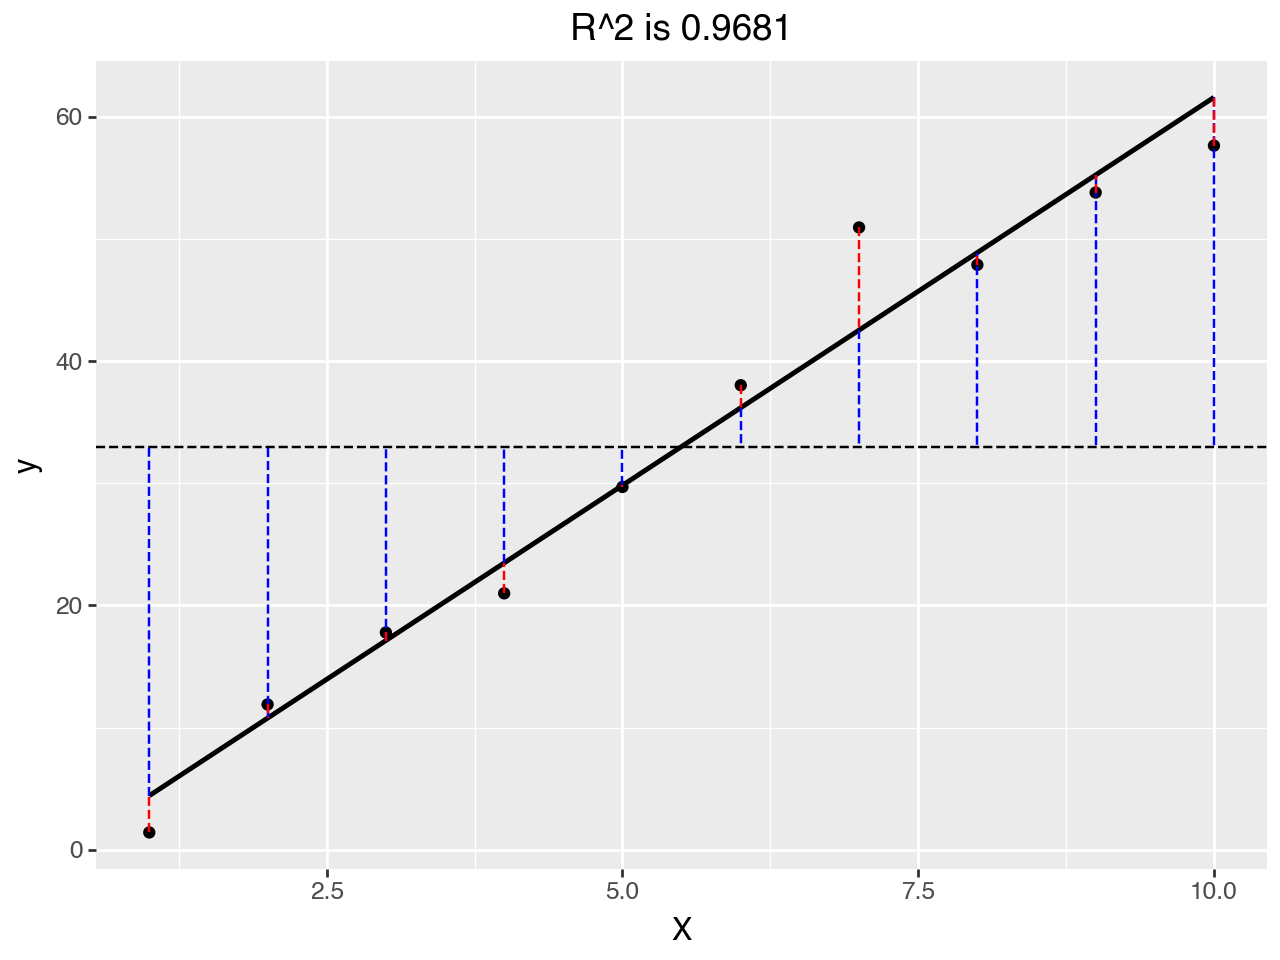


 ----------------- 



In [6]:
alpha = 0.05
sigma = 5
beta1 = 3
beta0 = 3
n = 10
for i in range(1, 12):
    beta1 = i/2 #iterate slope from 0.5 to range-1
    X, y = generate_data(sigma = sigma, beta0=beta0, beta1=beta1, sample_size=n)
    if show_prints:
        print(f"alpha: {alpha}")
        print(f"sigma: {sigma}")
        print(f"Slope: {beta1}")
        print(f"Intercept: {beta0}")
        print(f"Sample Size: {n}")
    gg1, gg2, F_stat = ss_decomp(X, y)
    hypothesis_test(F_stat=F_stat, n=n, alpha=0.05)

    if show_plots:
        gg1.show()
        gg2.show()

if show_prints:
    print("\n ----------------- \n")


4. Holding the slope, sample size, and error variance constant, compare how different values of the intercept affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?

<div style="background-color: #d0f0c0; color: #000000; padding: 10px; border-radius: 5px;">
Increasing the intercept also leads to a better-fitting model. This is reflected in higher SSR, R2 and F-statistic values, and lower SSE. The hypothesis test becomes more likely to reject the null hypothesis, indicating stronger evidence of a linear relationship.

Since the baseline level of y increases, 
</div>

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 0.5
Sample Size: 10
SST (Total Sum of Squares): 1351.9049
SSR (Regression Sum of Squares): 1056.2292
SSE (Error Sum of Squares): 295.6757
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.7813
F-statistic: 28.57804547346975
p-value: 0.000689280016894056
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


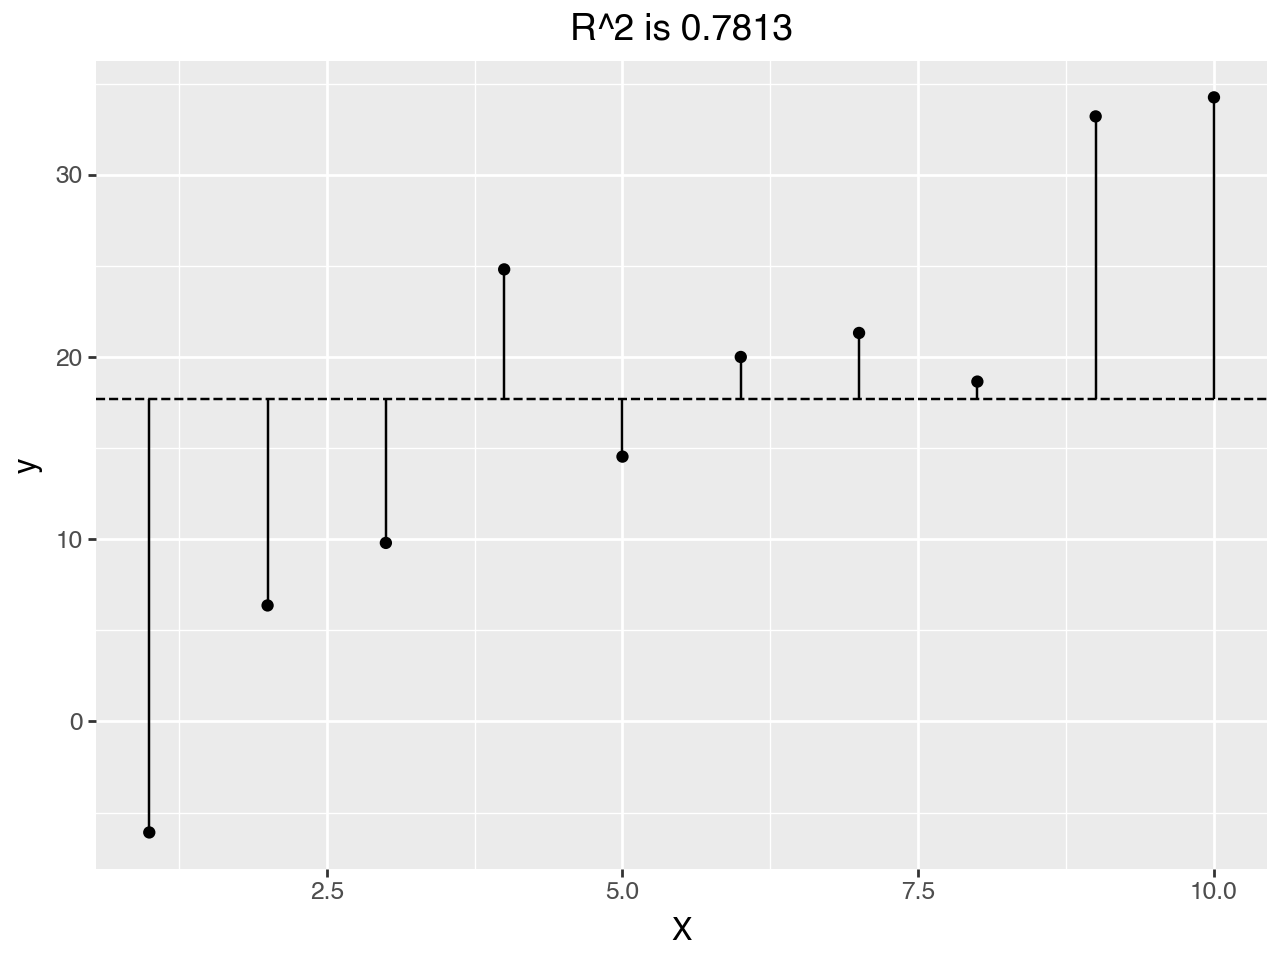

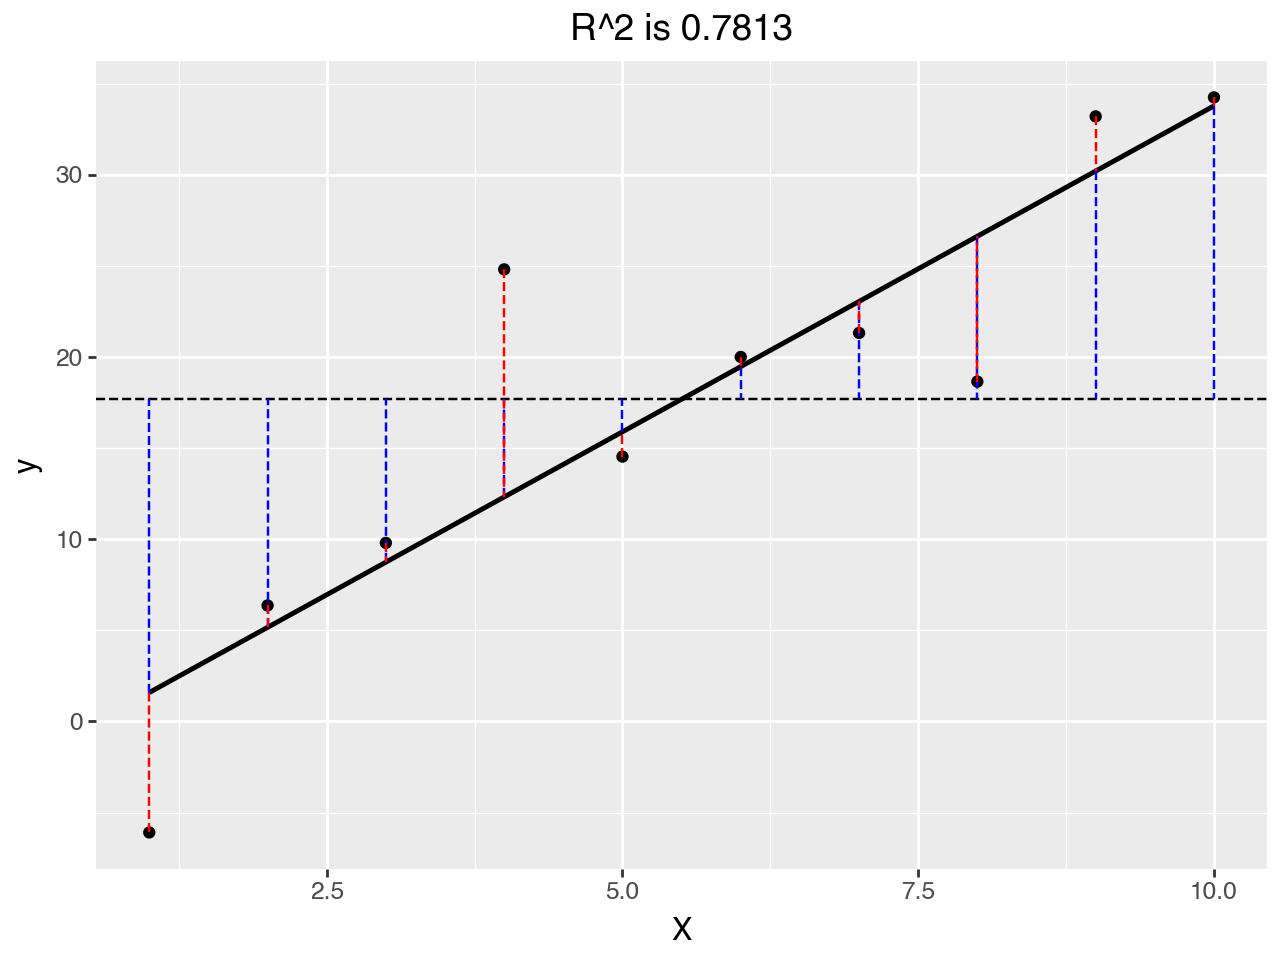

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 1.0
Sample Size: 10
SST (Total Sum of Squares): 869.6871
SSR (Regression Sum of Squares): 578.7573
SSE (Error Sum of Squares): 290.9298
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.6655
F-statistic: 15.914692822804676
p-value: 0.004009108583855947
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


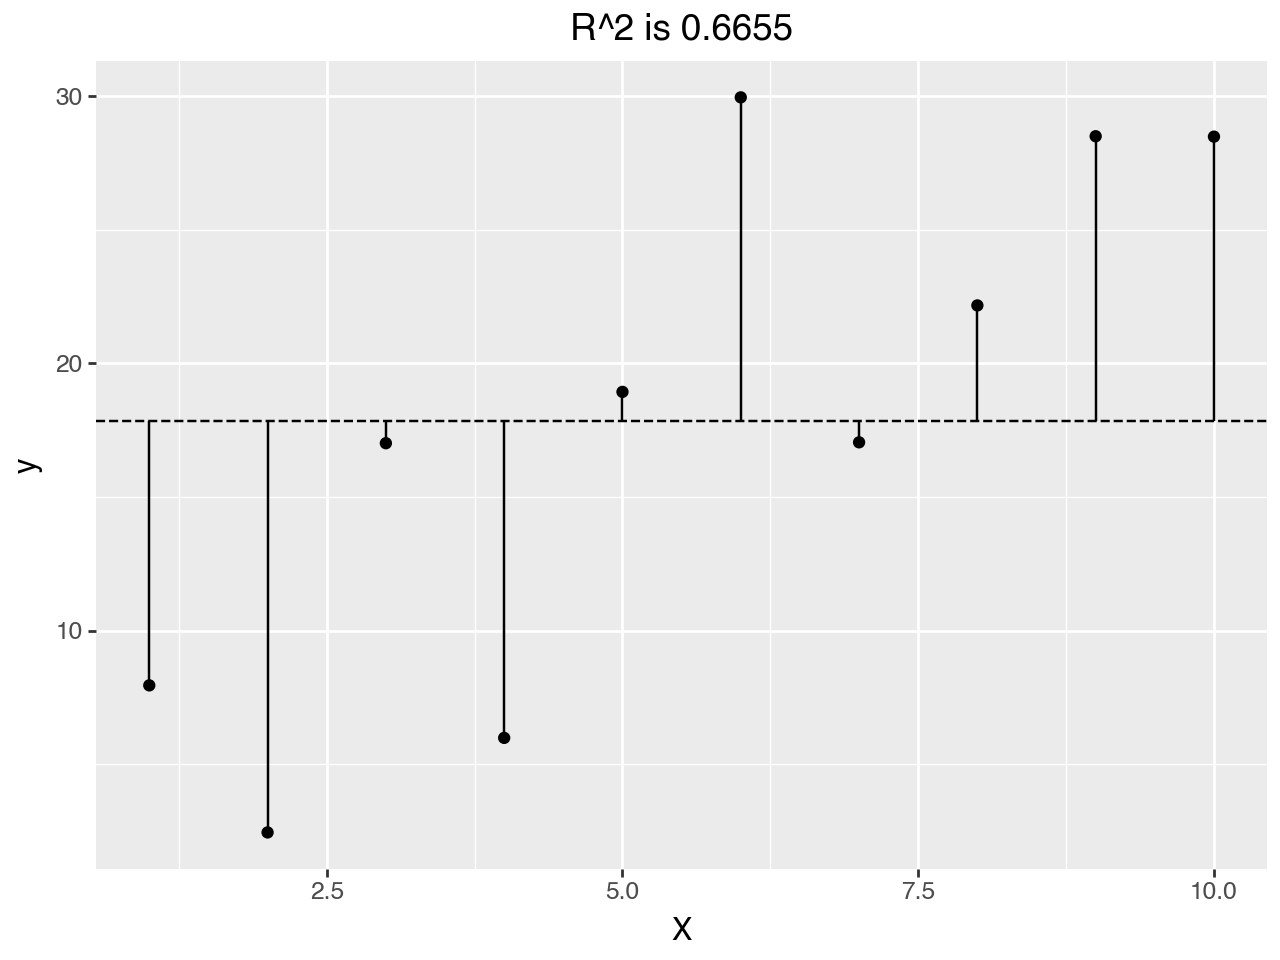

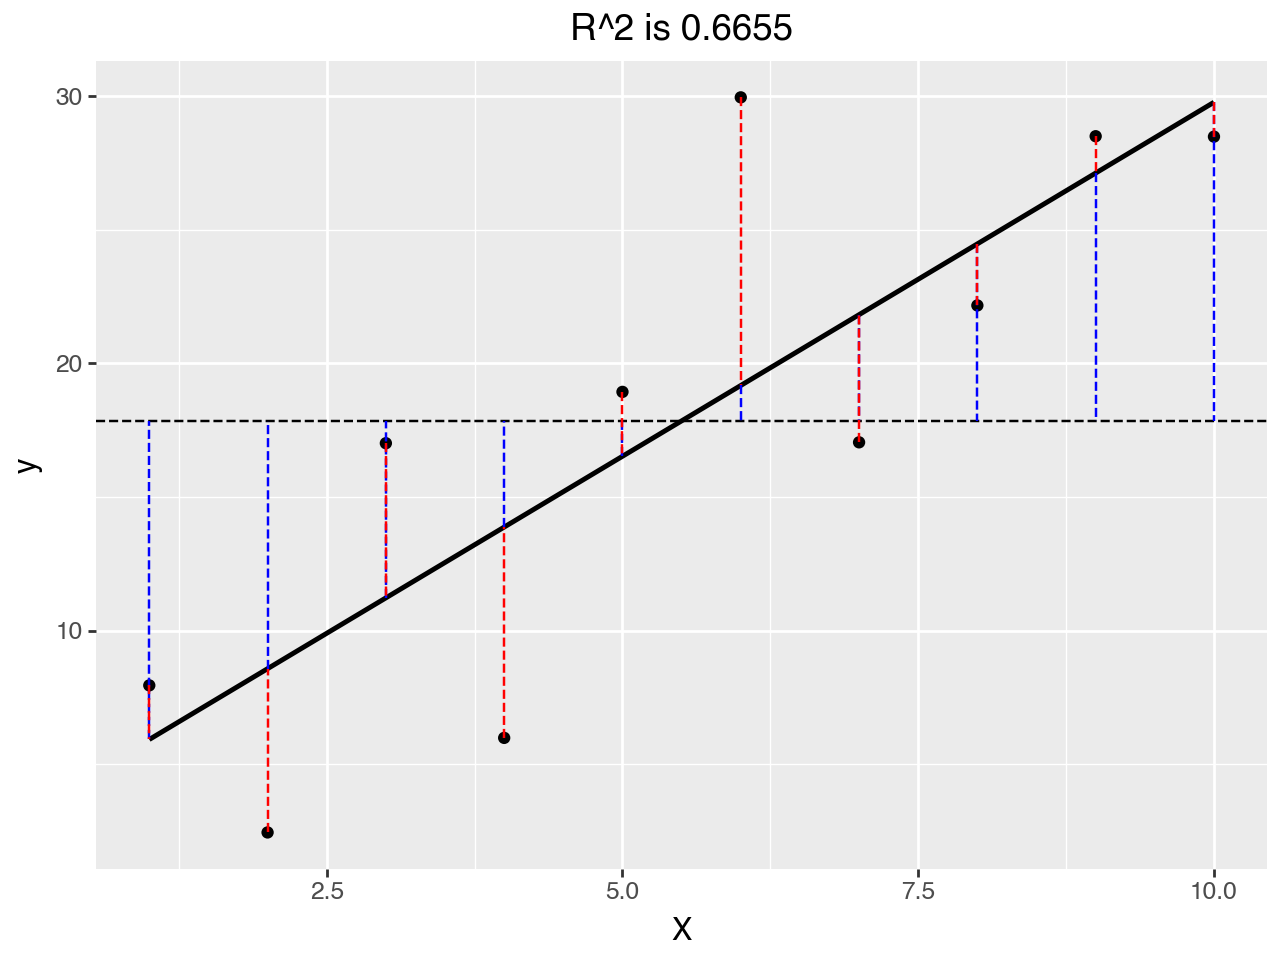

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 1.5
Sample Size: 10
SST (Total Sum of Squares): 1125.5387
SSR (Regression Sum of Squares): 908.2346
SSE (Error Sum of Squares): 217.3042
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8069
F-statistic: 33.4364305890084
p-value: 0.0004133706947834215
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


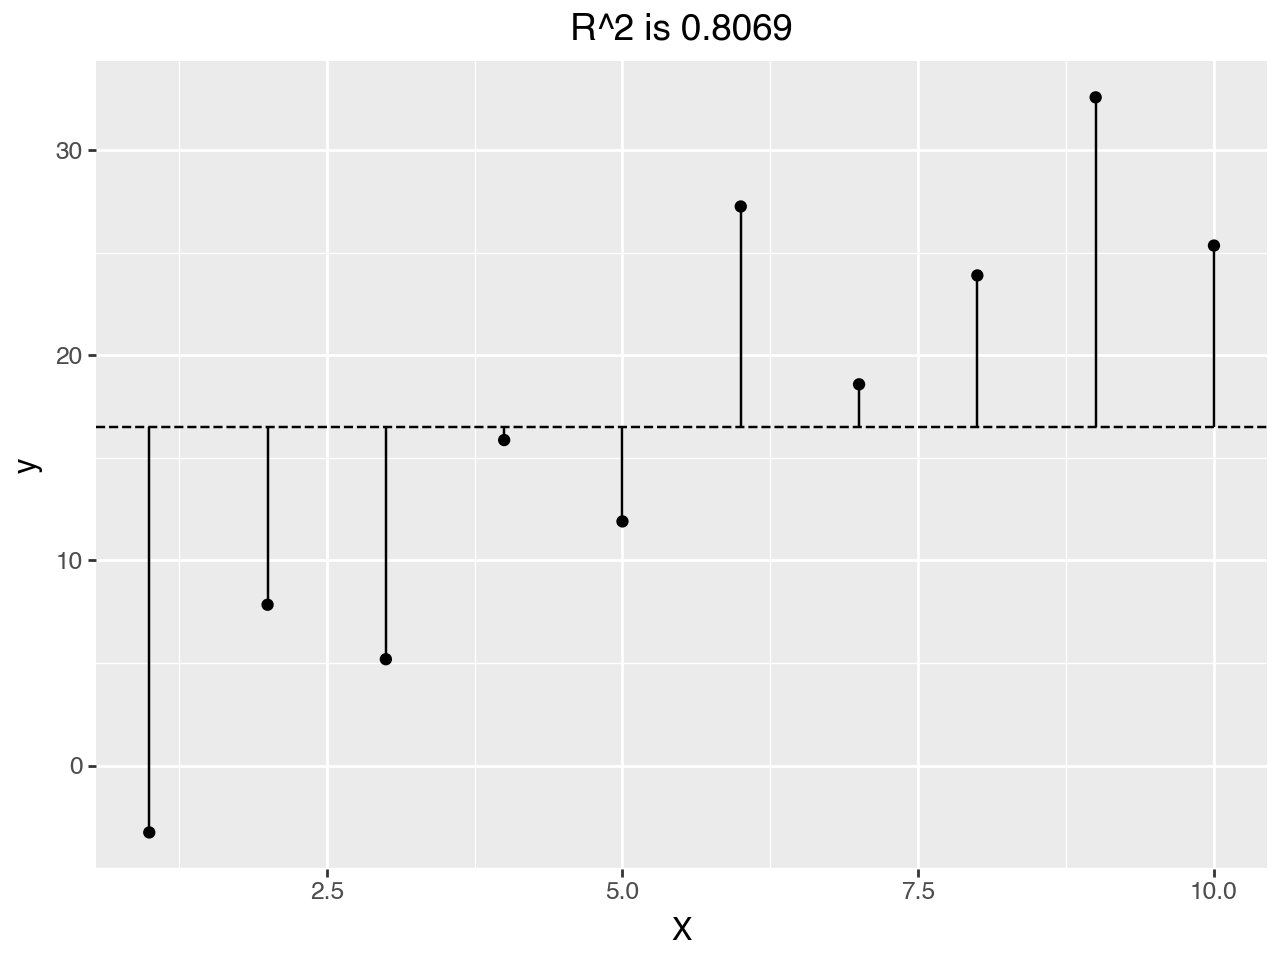

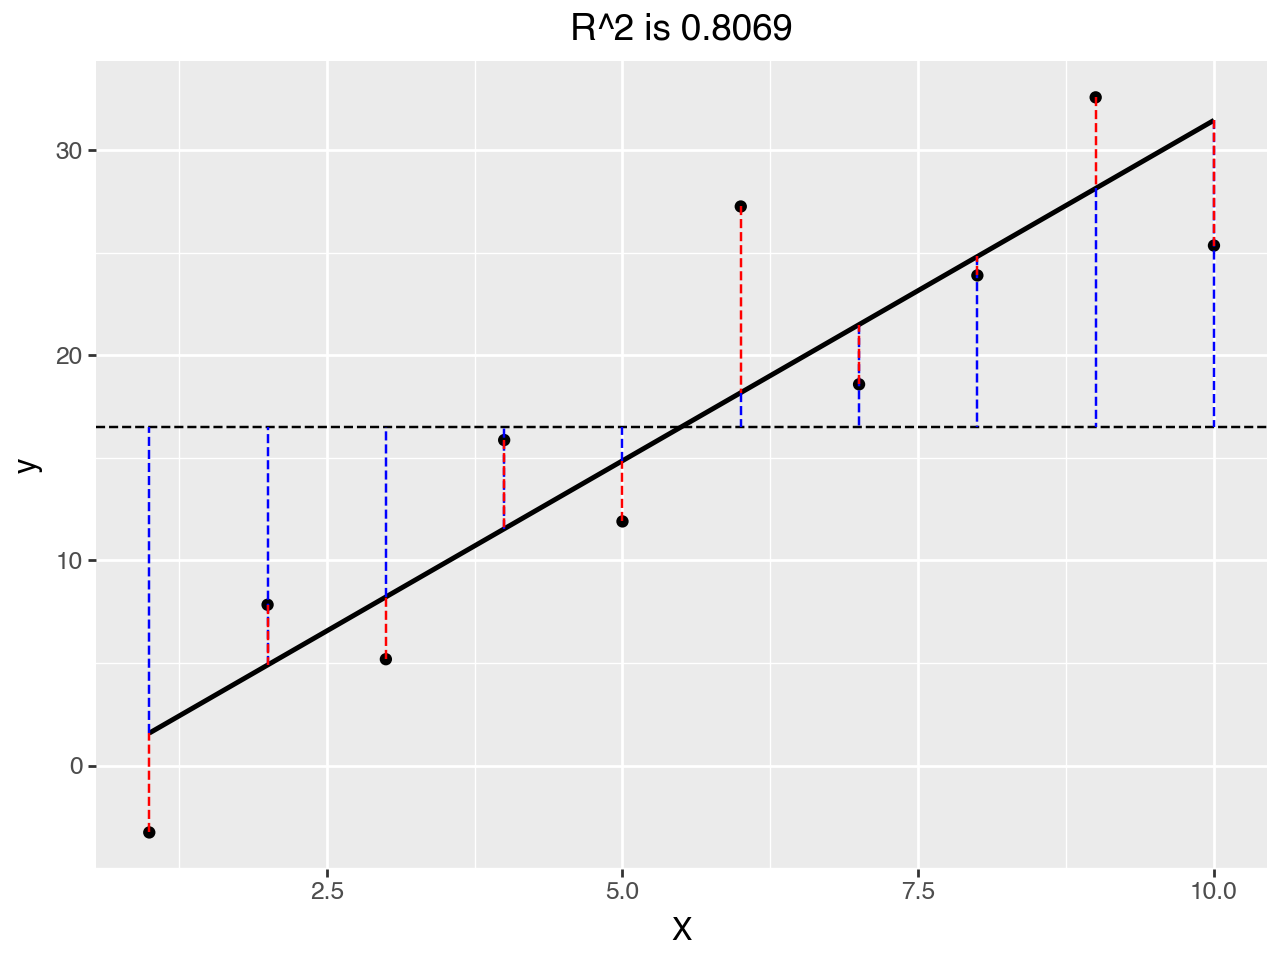

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 2.0
Sample Size: 10
SST (Total Sum of Squares): 851.2567
SSR (Regression Sum of Squares): 638.7282
SSE (Error Sum of Squares): 212.5285
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.7503
F-statistic: 24.04301352524485
p-value: 0.0011887022786961632
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


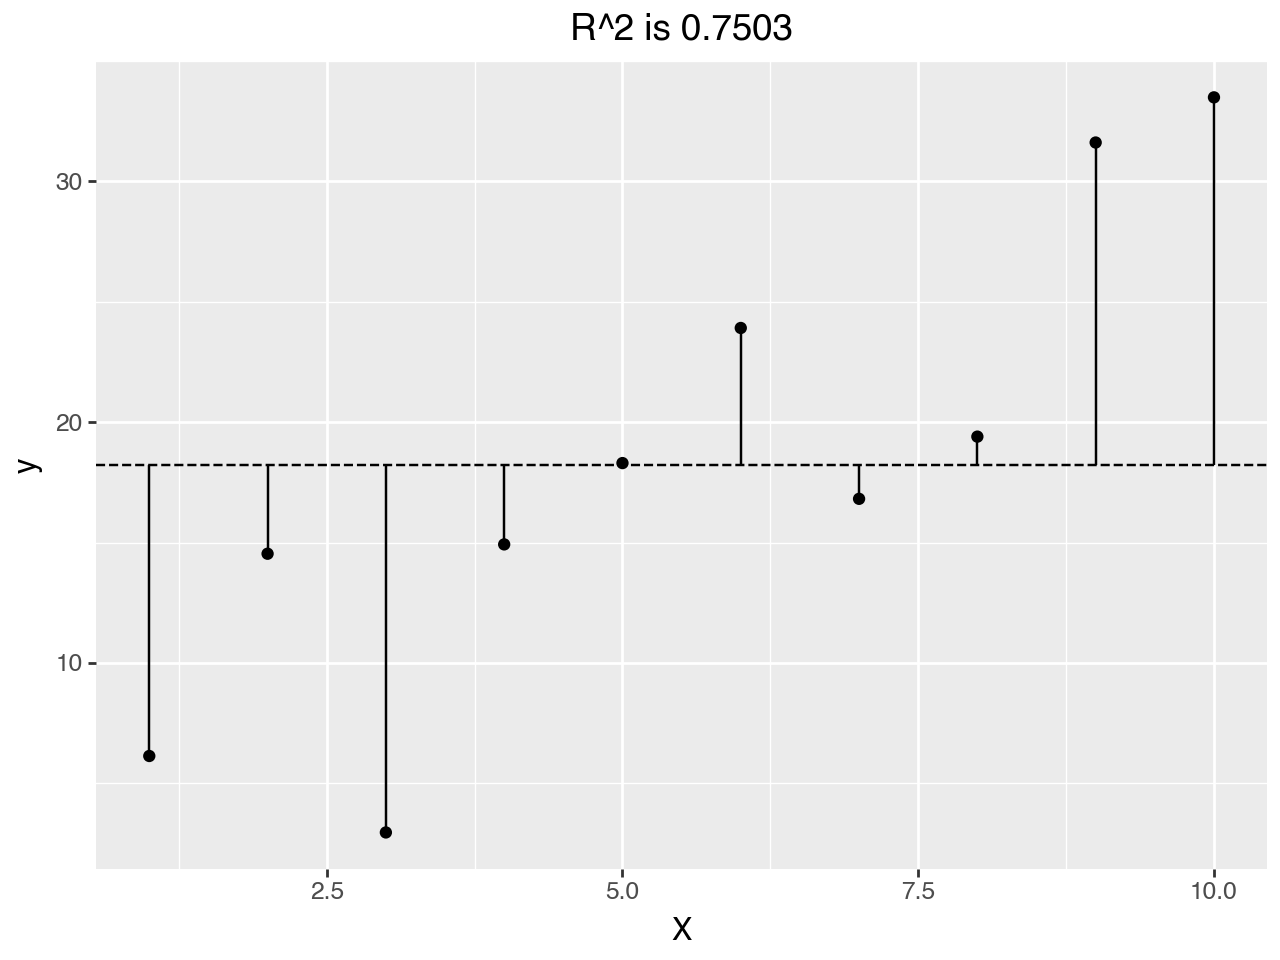

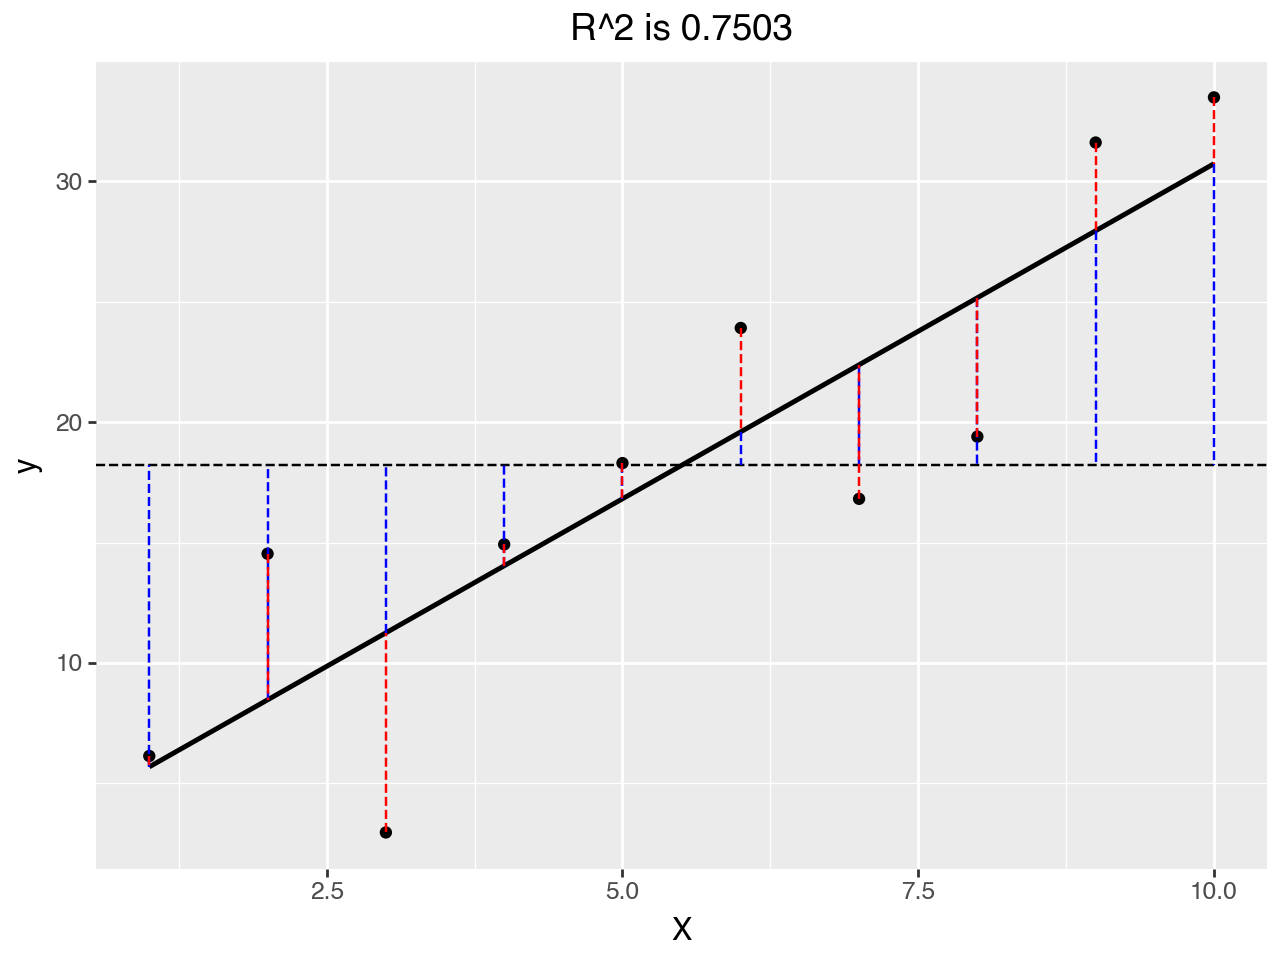

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 2.5
Sample Size: 10
SST (Total Sum of Squares): 946.1983
SSR (Regression Sum of Squares): 781.2843
SSE (Error Sum of Squares): 164.914
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8257
F-statistic: 37.900204955310045
p-value: 0.0002721075583517196
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


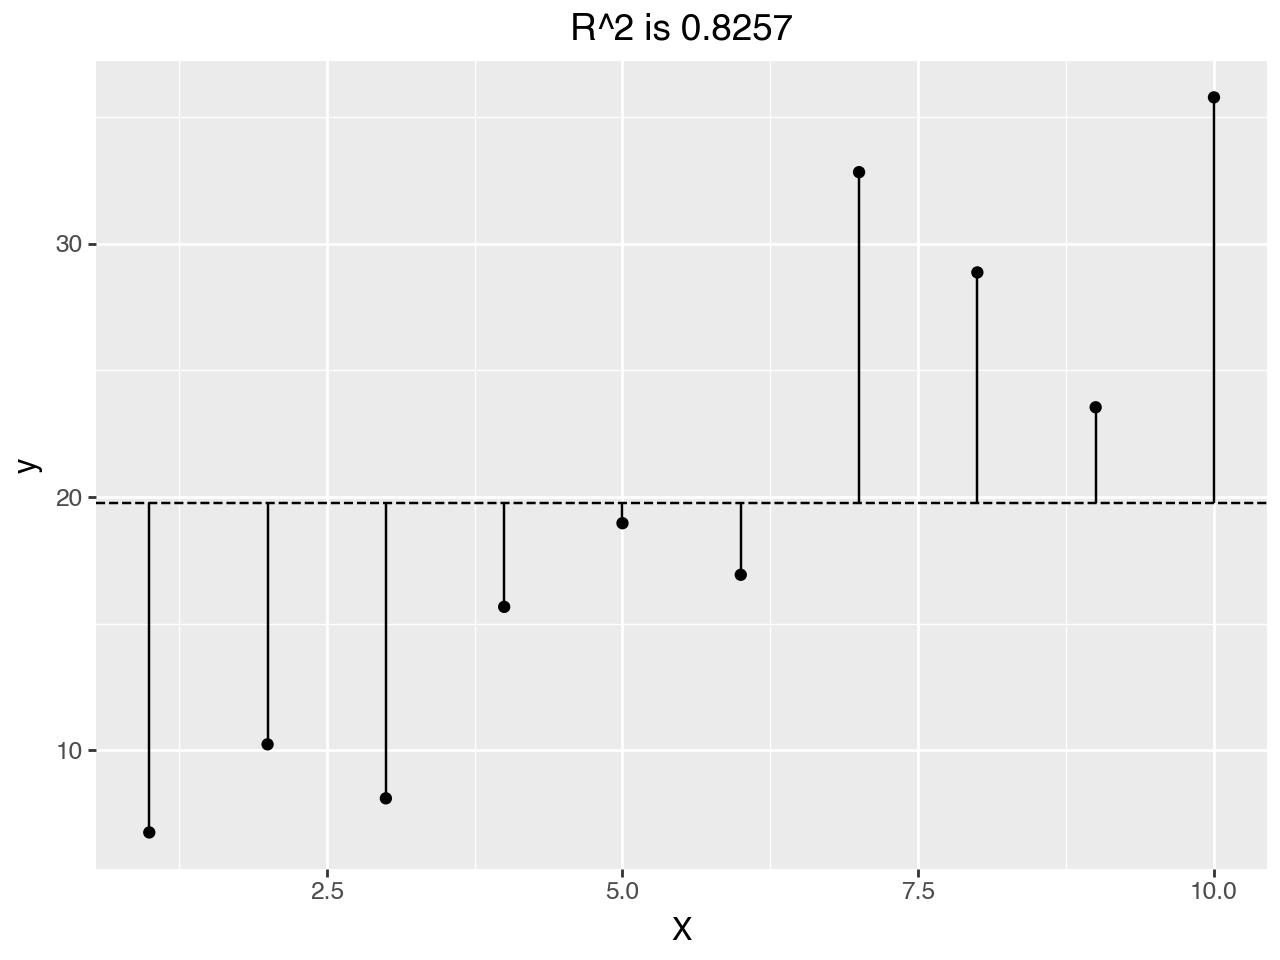

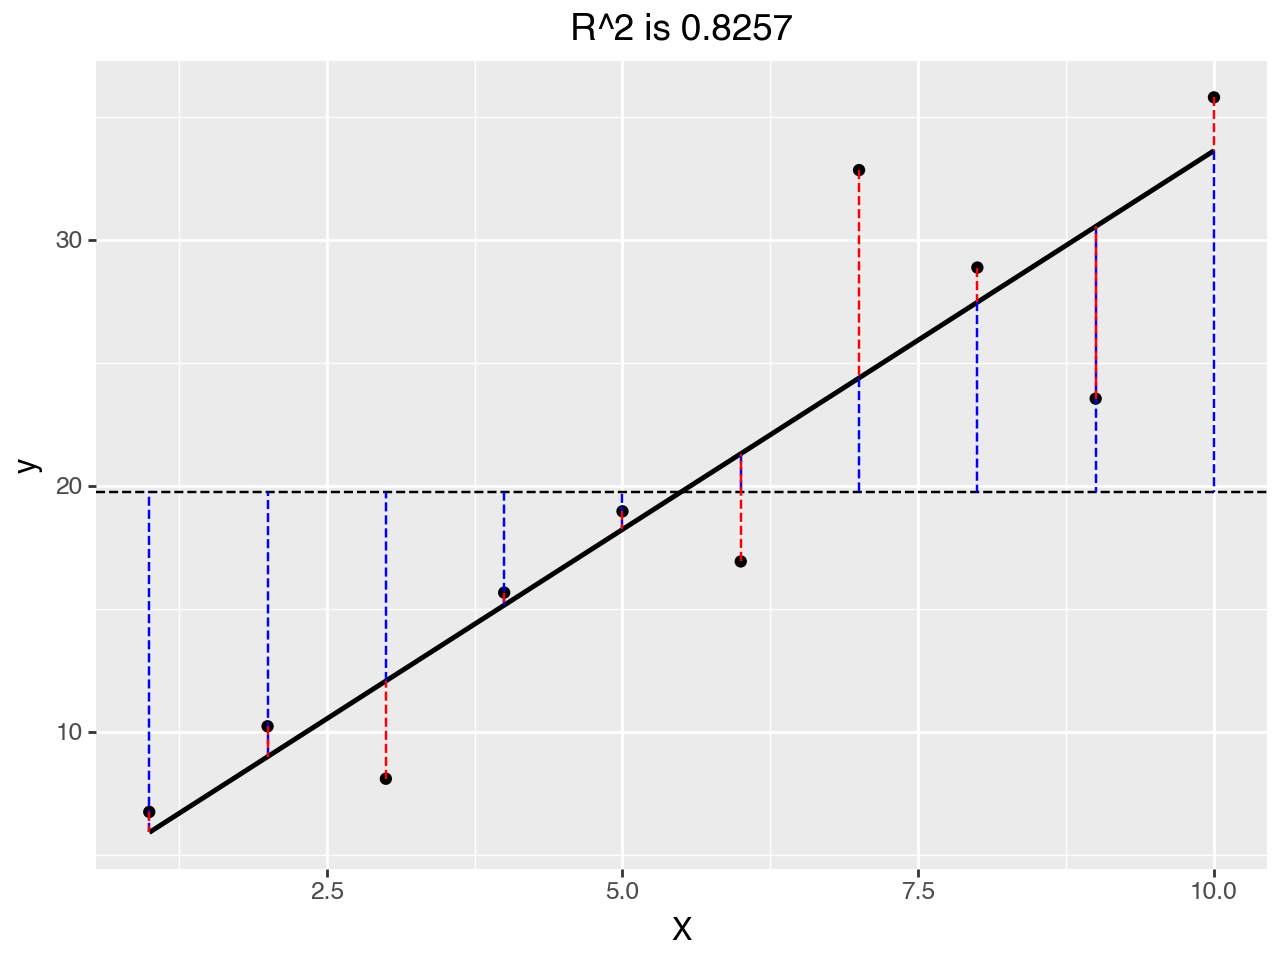

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 3.0
Sample Size: 10
SST (Total Sum of Squares): 998.2475
SSR (Regression Sum of Squares): 785.554
SSE (Error Sum of Squares): 212.6936
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.7869
F-statistic: 29.546878702509147
p-value: 0.0006191266137334228
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


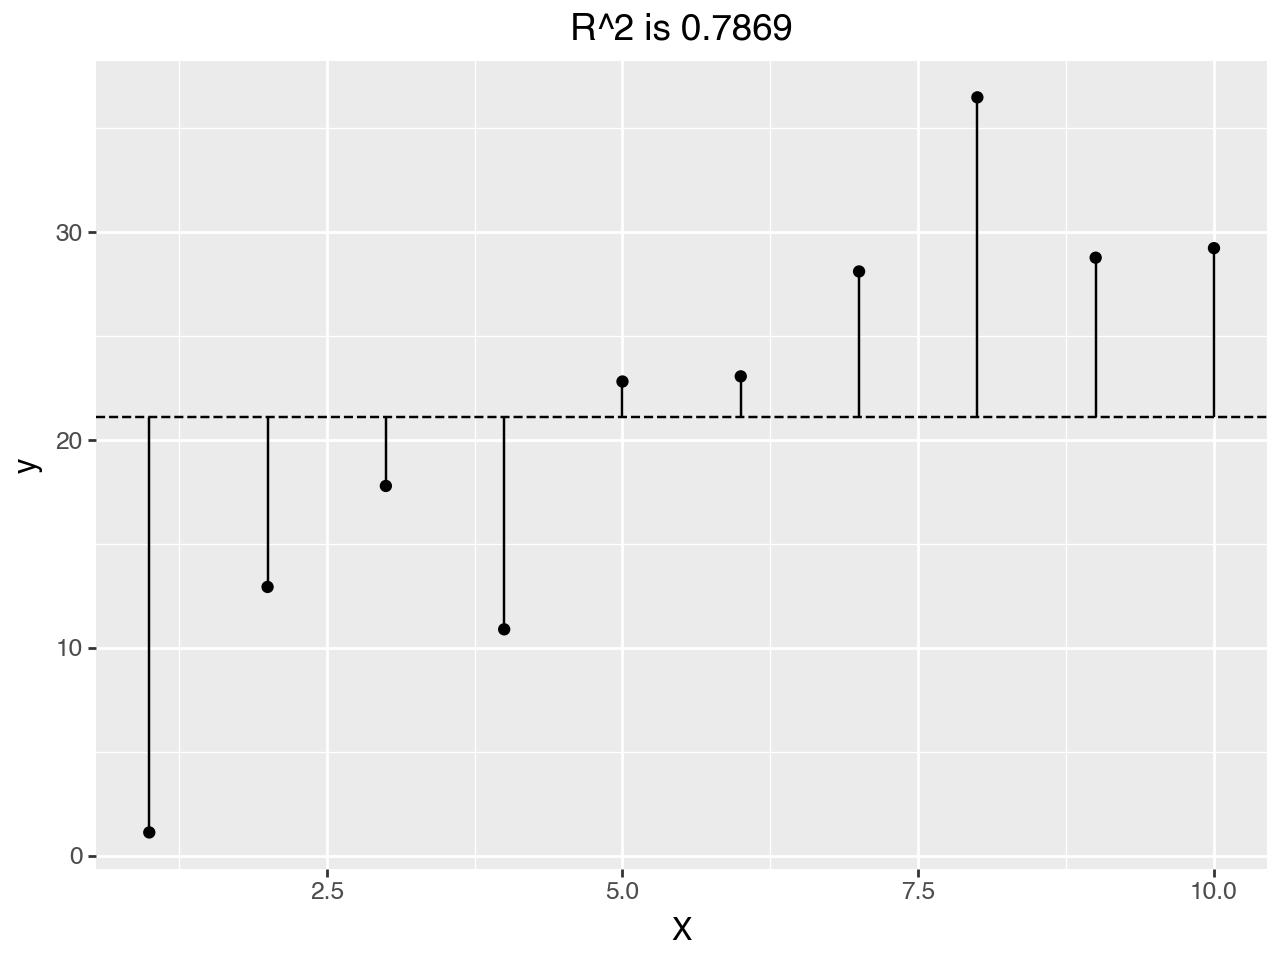

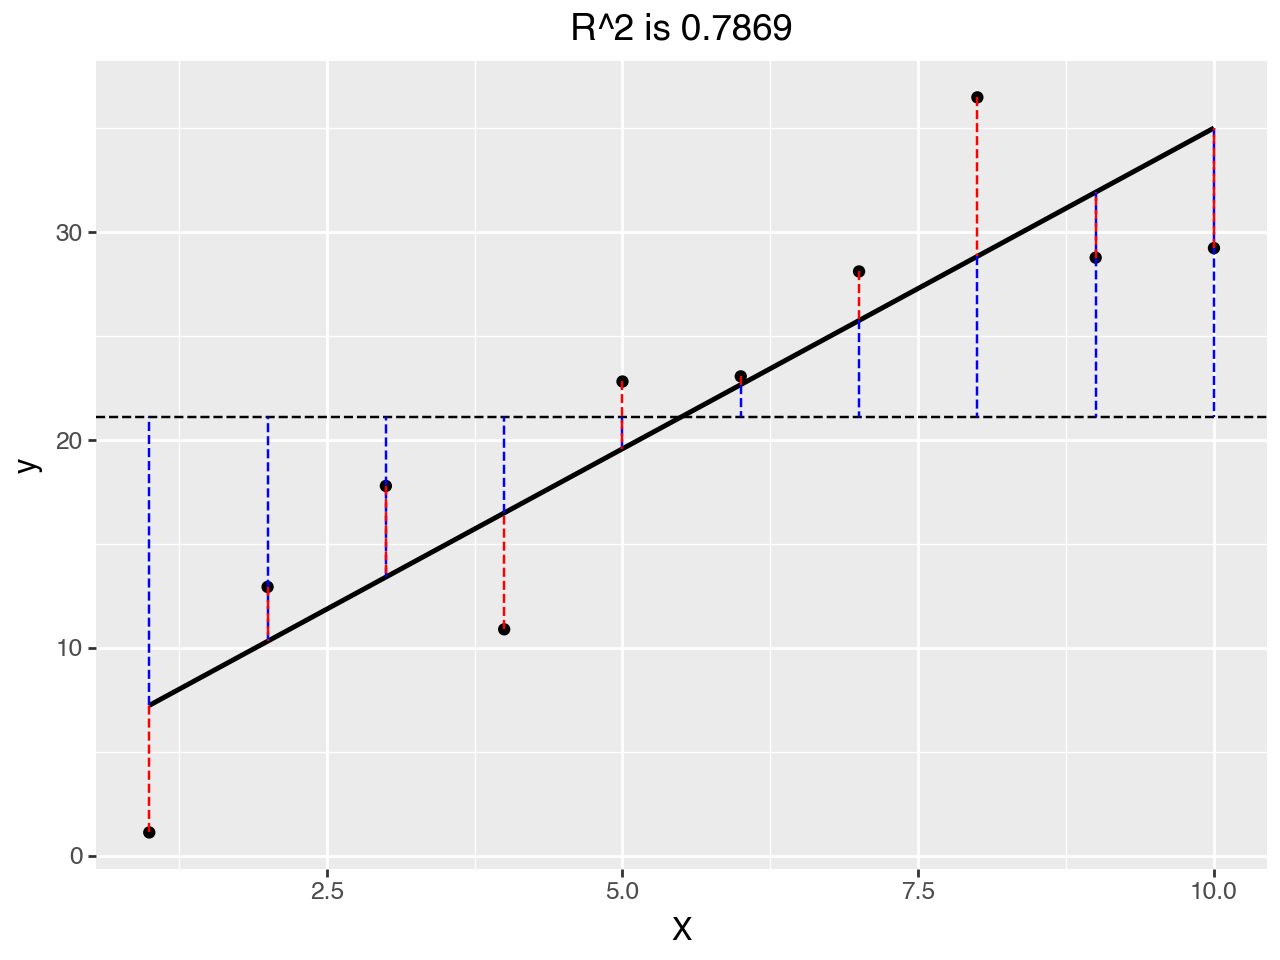

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 3.5
Sample Size: 10
SST (Total Sum of Squares): 1661.8974
SSR (Regression Sum of Squares): 1539.7441
SSE (Error Sum of Squares): 122.1533
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9265
F-statistic: 100.84011483930438
p-value: 8.227117996084665e-06
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


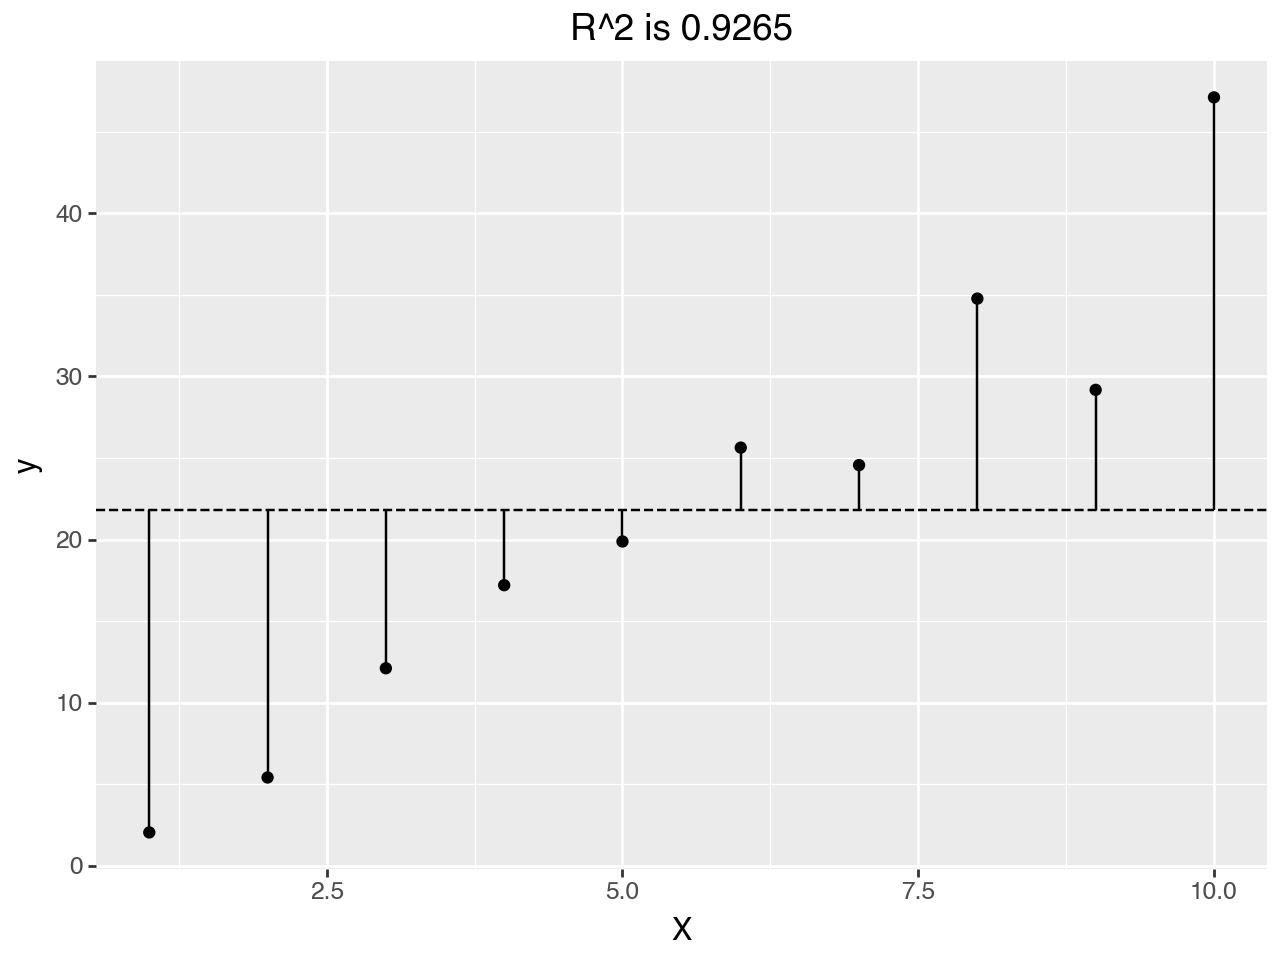

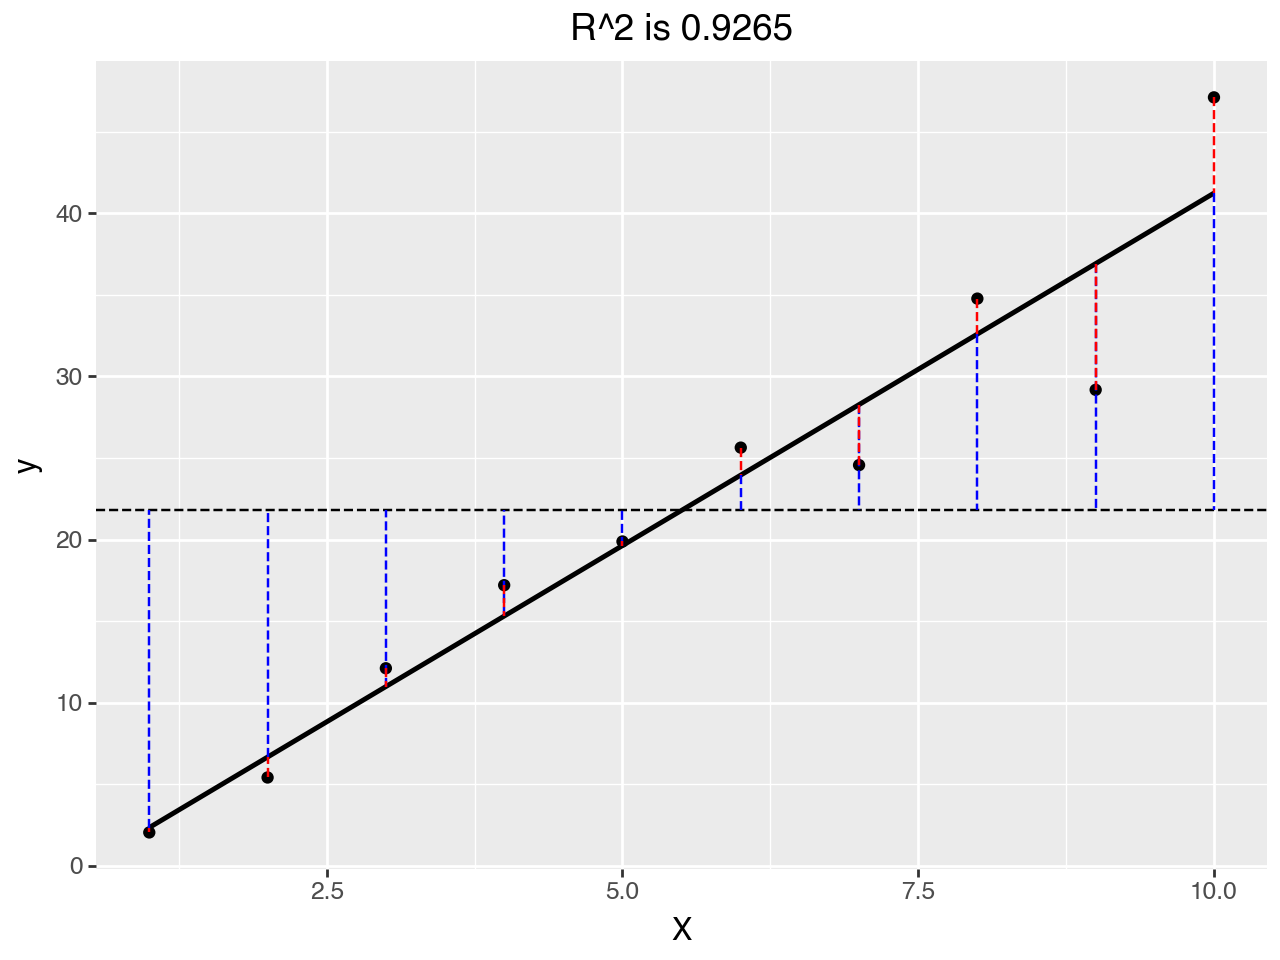

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 4.0
Sample Size: 10
SST (Total Sum of Squares): 687.6672
SSR (Regression Sum of Squares): 556.5045
SSE (Error Sum of Squares): 131.1627
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8093
F-statistic: 33.94285113069493
p-value: 0.00039332604522335224
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


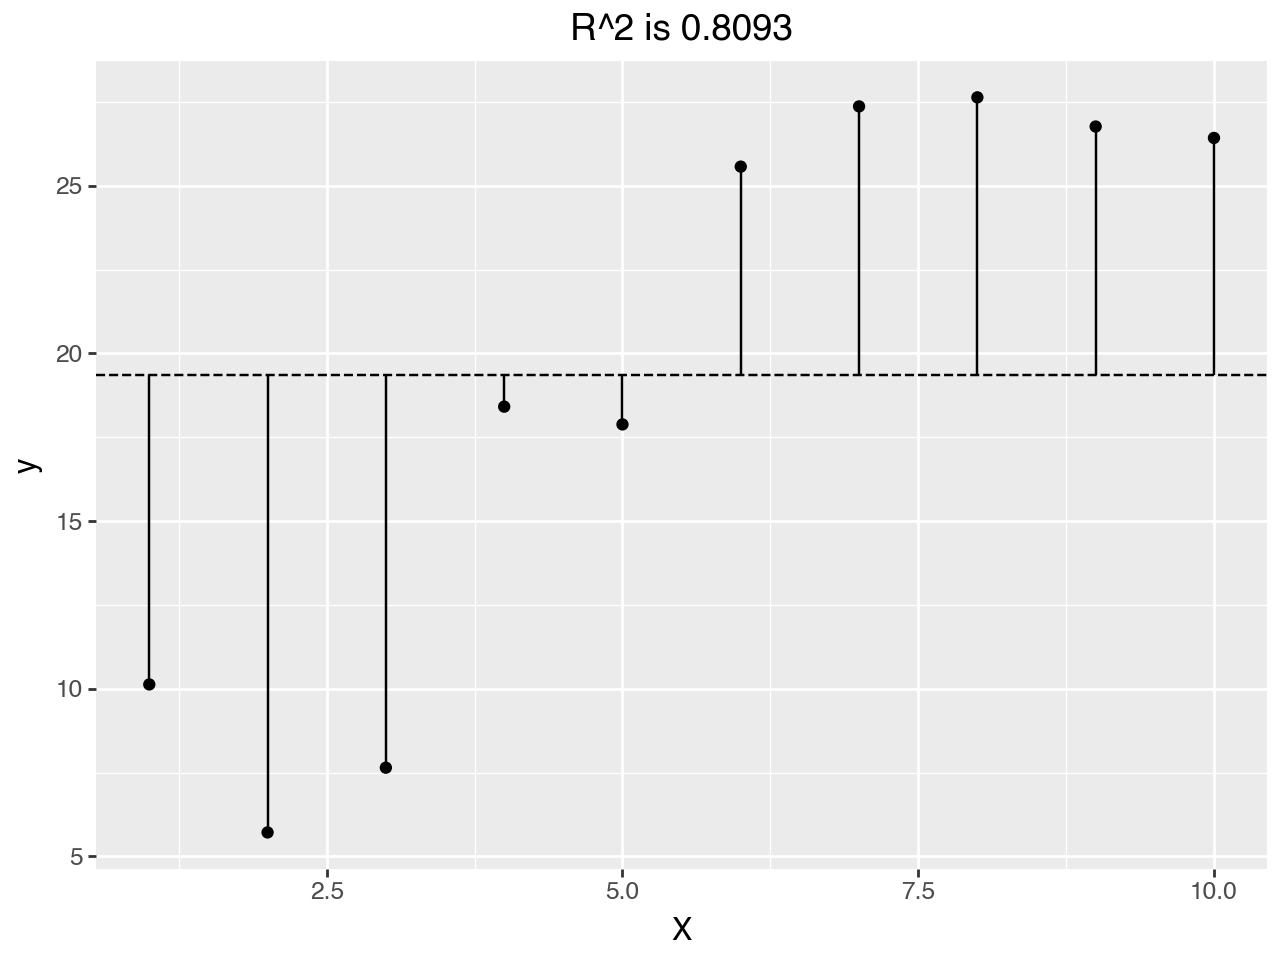

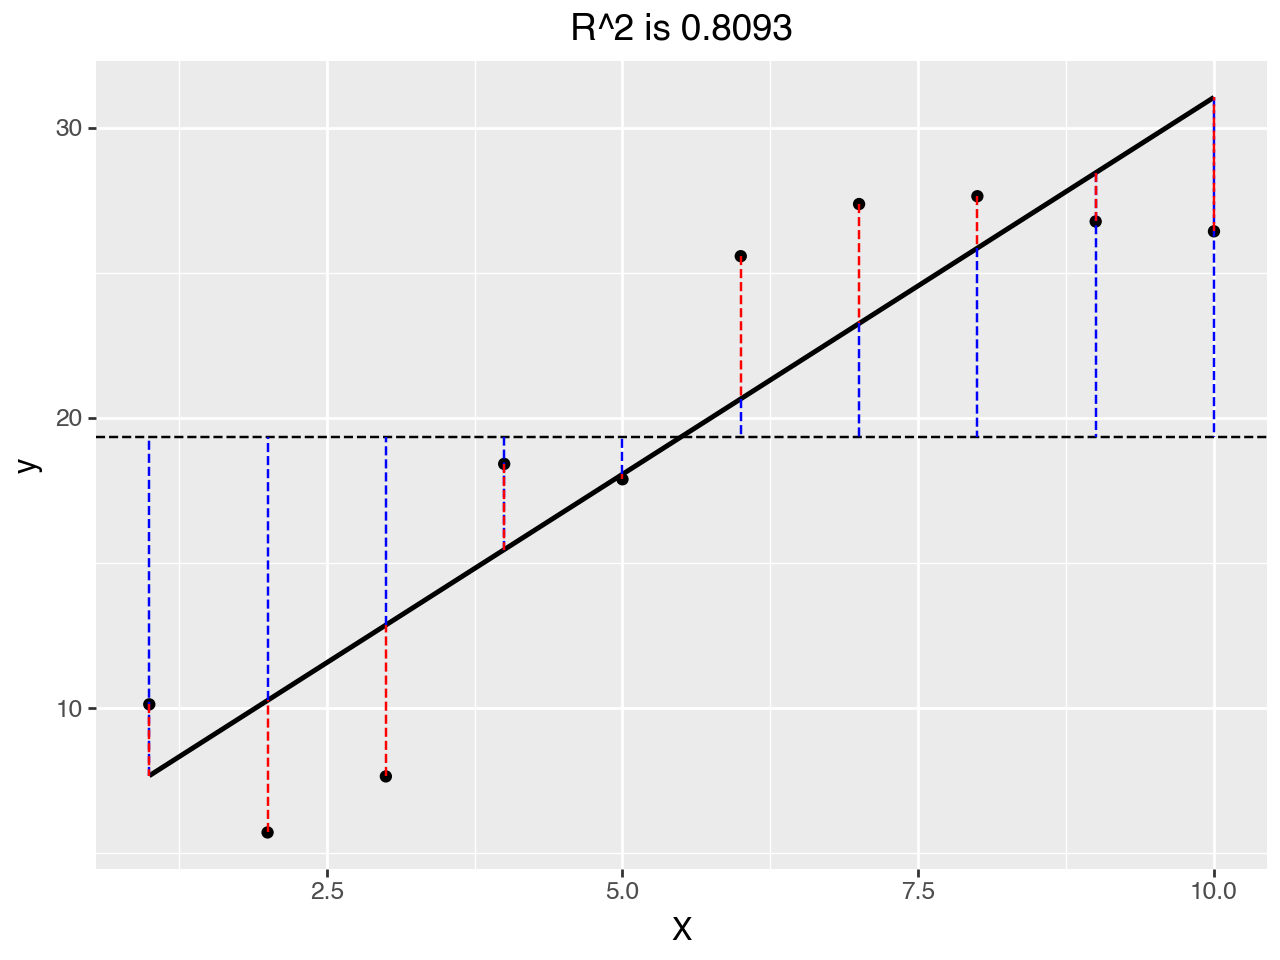

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 4.5
Sample Size: 10
SST (Total Sum of Squares): 691.378
SSR (Regression Sum of Squares): 588.5416
SSE (Error Sum of Squares): 102.8364
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8513
F-statistic: 45.78469102380091
p-value: 0.00014263123764313157
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


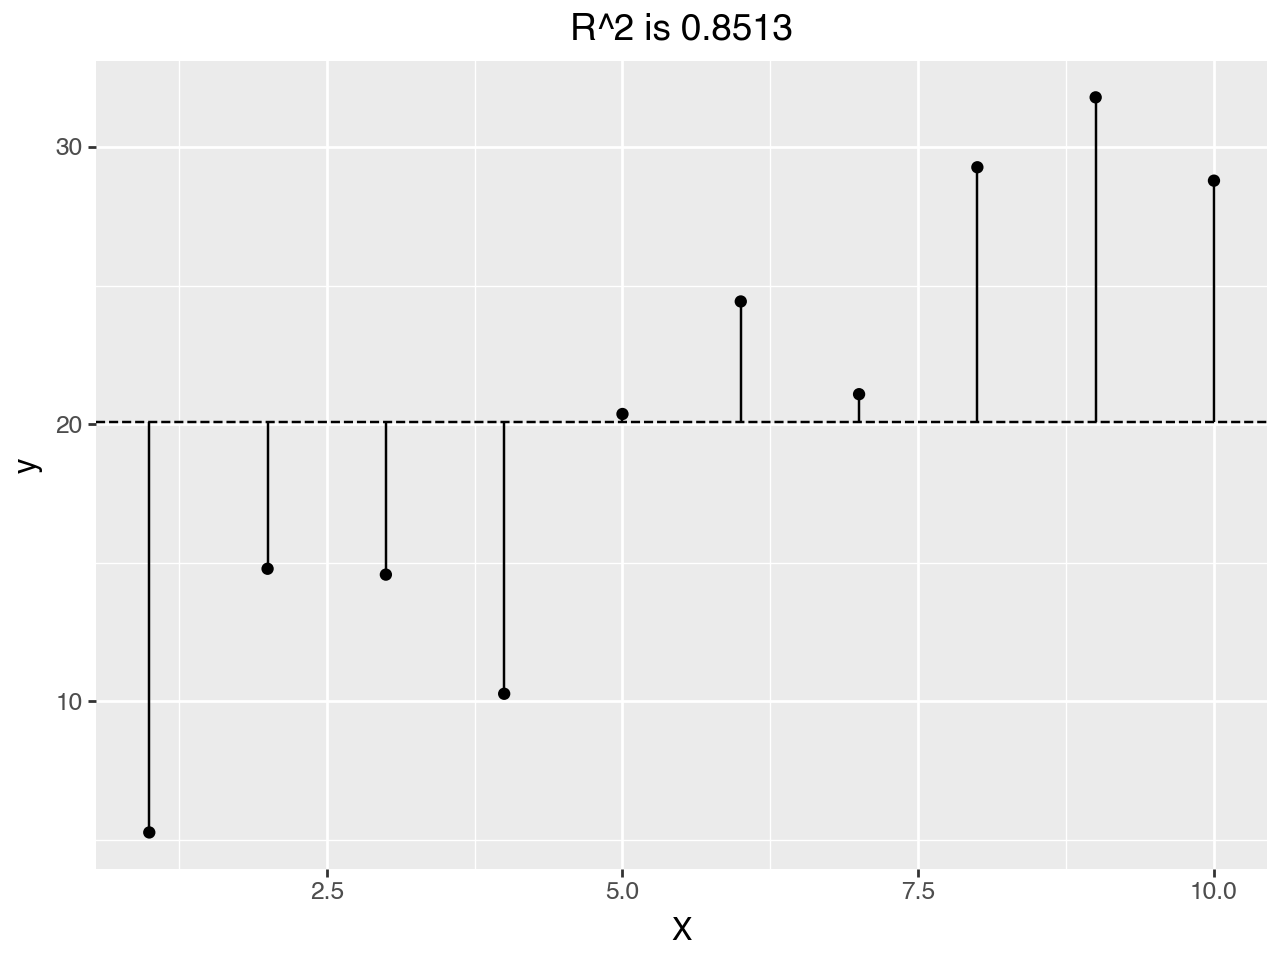

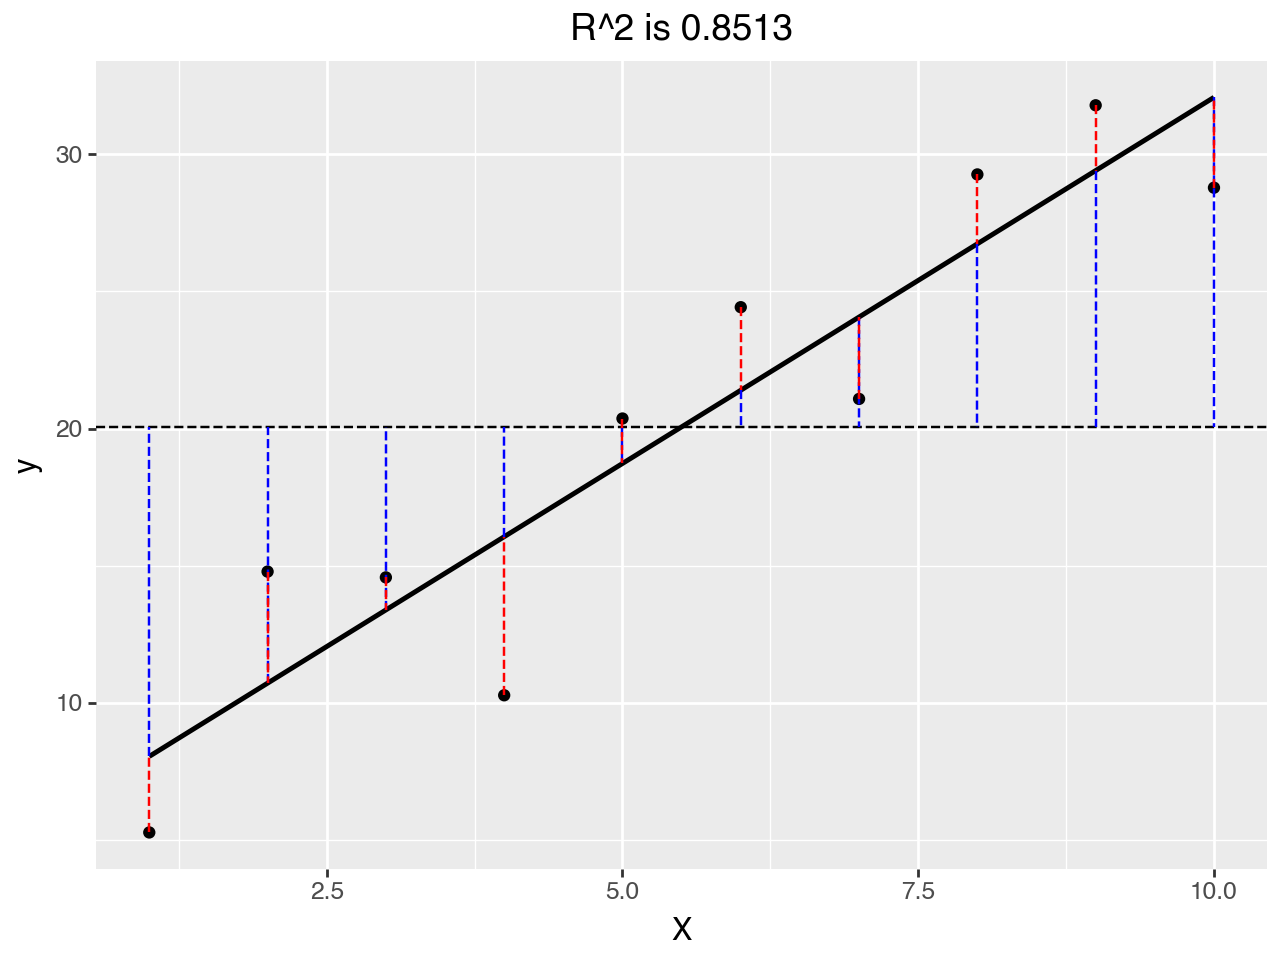

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 5.0
Sample Size: 10
SST (Total Sum of Squares): 1583.5691
SSR (Regression Sum of Squares): 1204.8579
SSE (Error Sum of Squares): 378.7111
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.7608
F-statistic: 25.45175781750258
p-value: 0.0009954507054464878
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


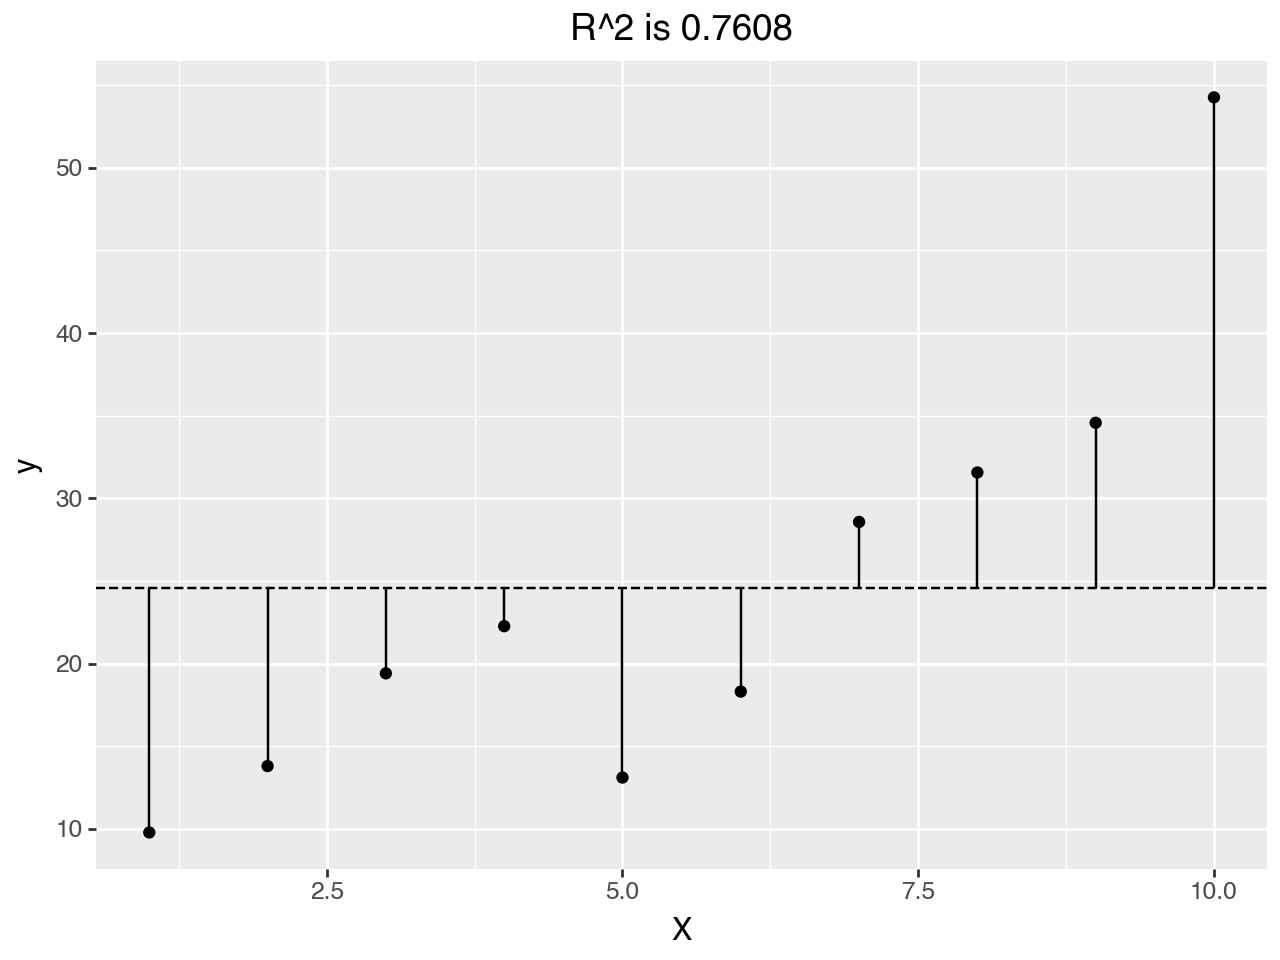

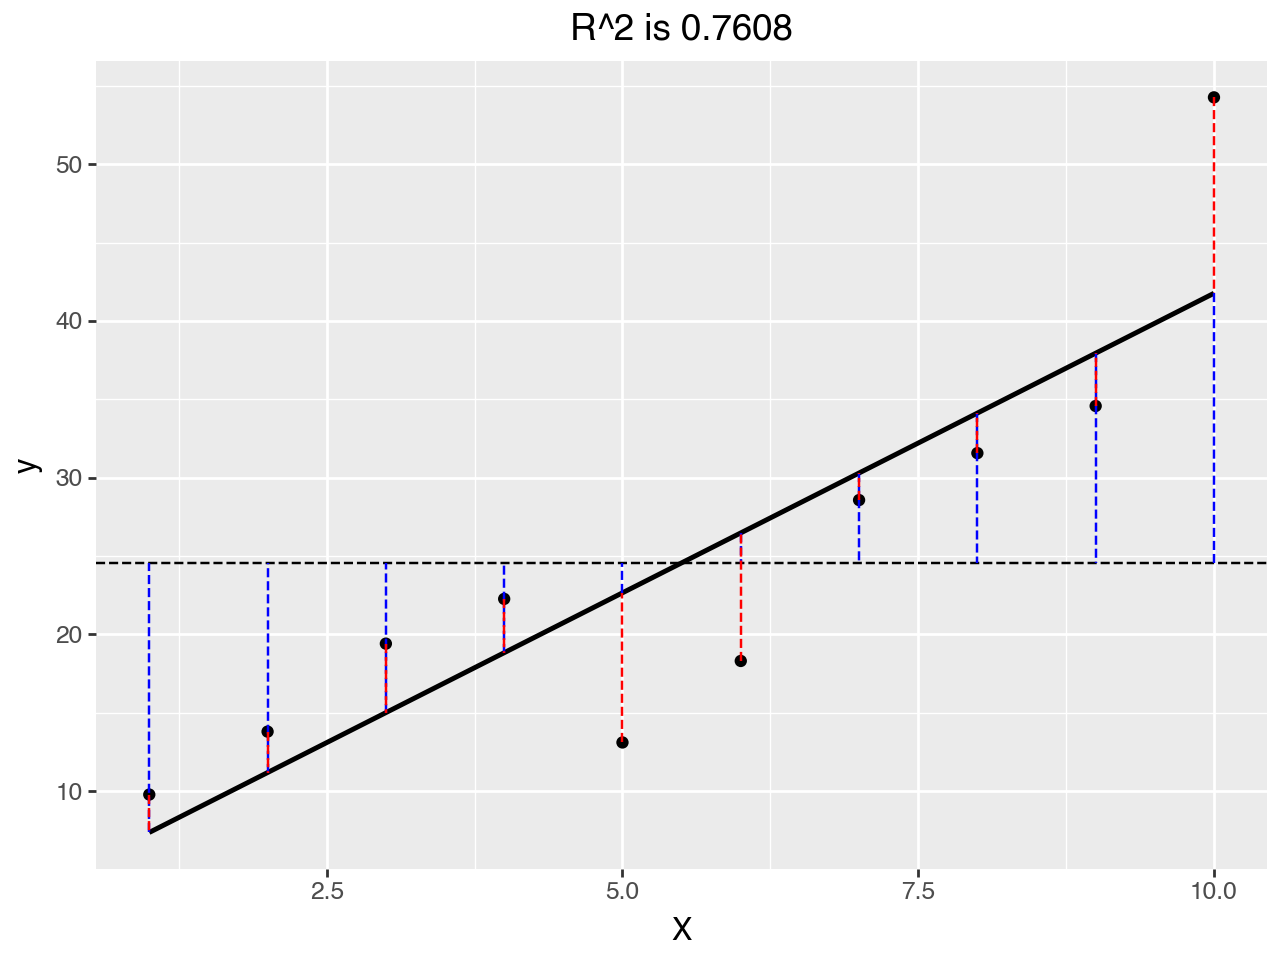

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 5.5
Sample Size: 10
SST (Total Sum of Squares): 468.3029
SSR (Regression Sum of Squares): 415.9686
SSE (Error Sum of Squares): 52.3343
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8882
F-statistic: 63.5863821623677
p-value: 4.469896423830999e-05
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


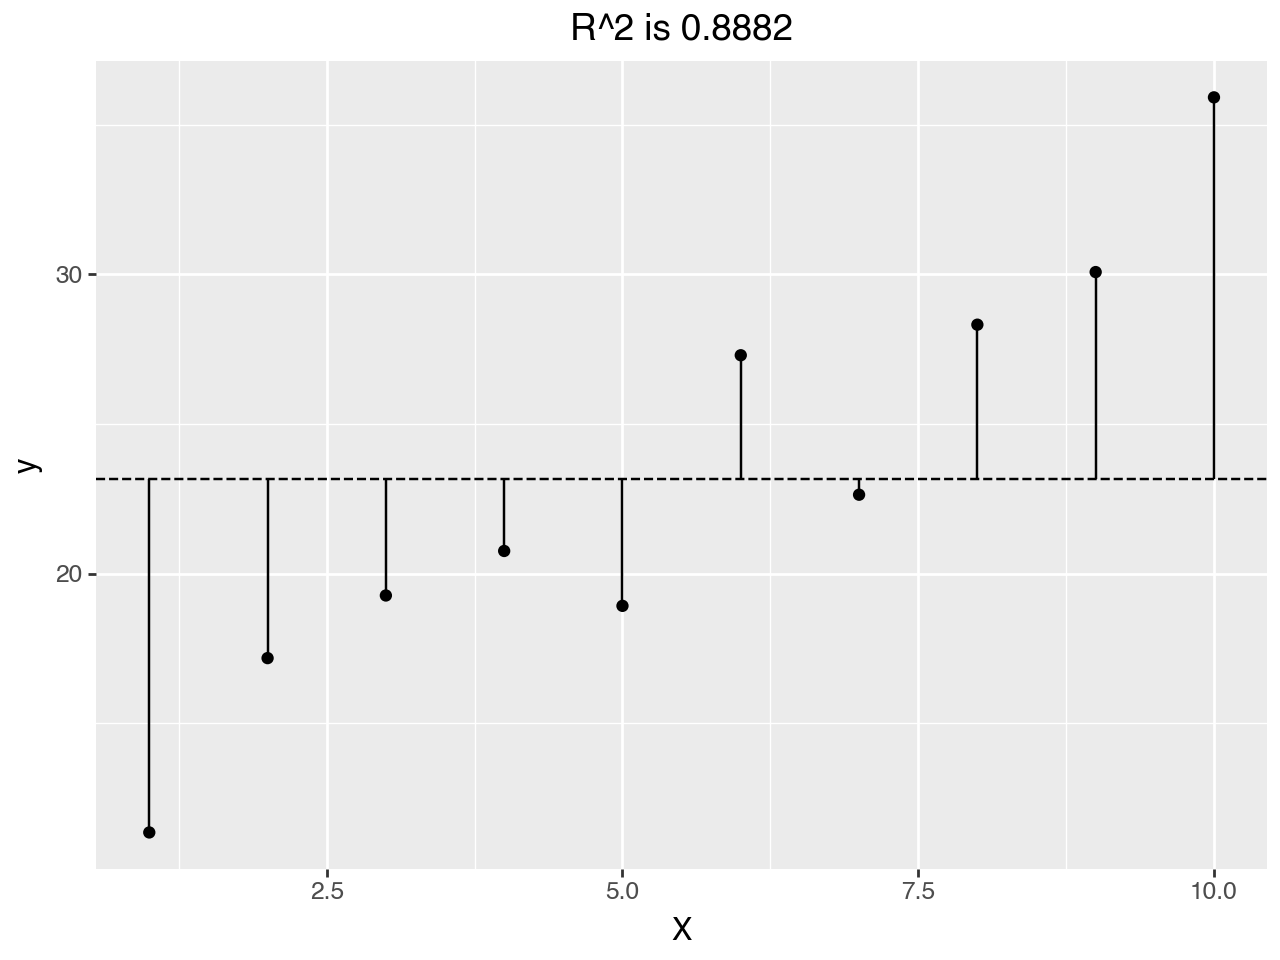

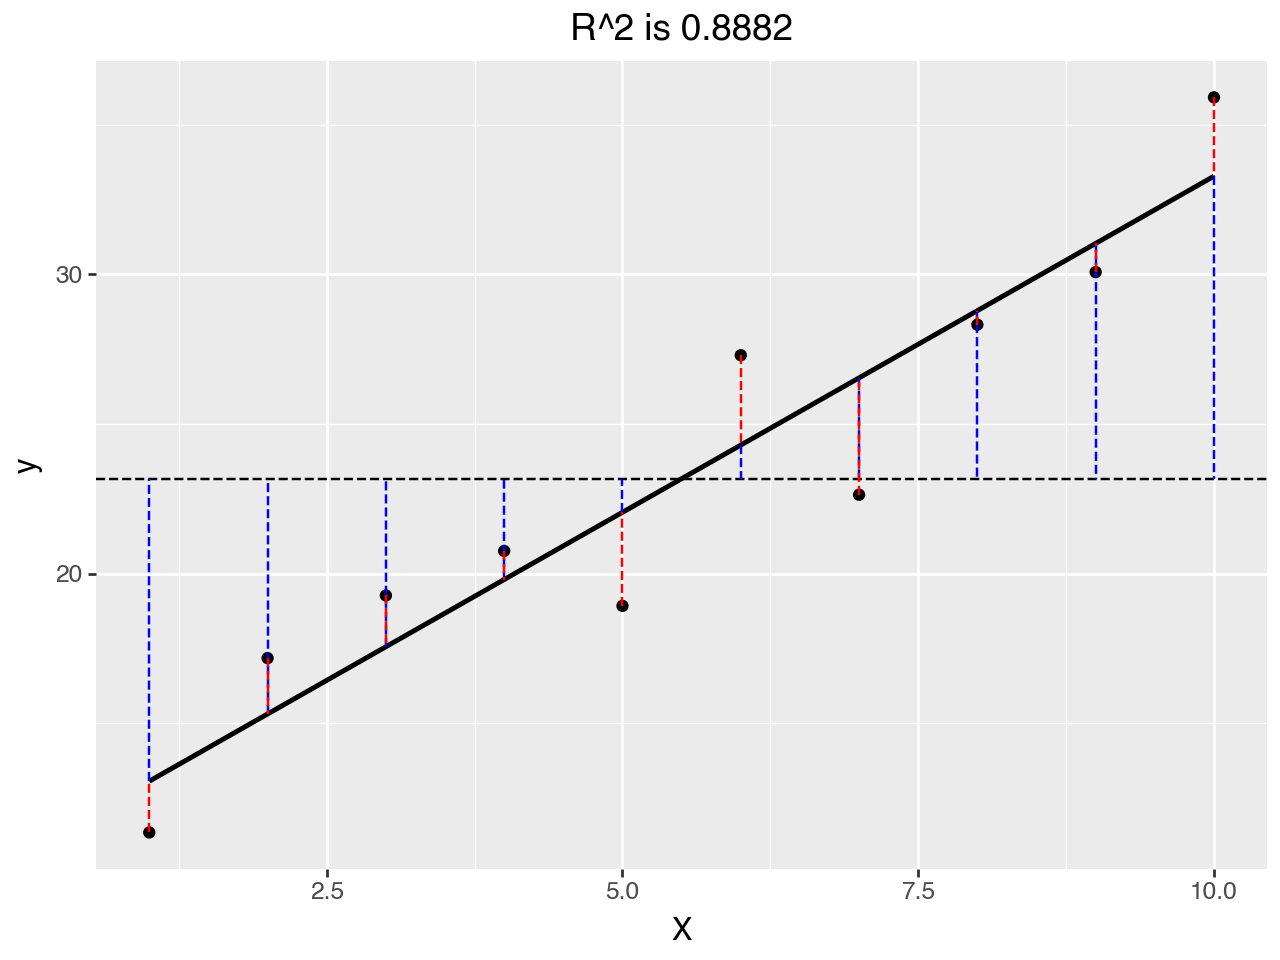


 ----------------- 



In [7]:
alpha = 0.05
sigma = 5
beta1 = 3
beta0 = 3
n = 10
for i in range(1, 12):
    beta0 = i/2 #iterate intercept from 0.5 to range-1
    X, y = generate_data(sigma = sigma, beta0=beta0, beta1=beta1, sample_size=n)
    if show_prints:
        print(f"alpha: {alpha}")
        print(f"sigma: {sigma}")
        print(f"Slope: {beta1}")
        print(f"Intercept: {beta0}")
        print(f"Sample Size: {n}")
    gg1, gg2, F_stat = ss_decomp(X, y)
    hypothesis_test(F_stat=F_stat, n=n, alpha=0.05)
    
    if show_plots:
        gg1.show()
        gg2.show()
if show_prints:
    print("\n ----------------- \n")


5. Holding the intercept, slope, and error variance constant, compare how different values of the sample size affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?

<div style="background-color: #d0f0c0; color: #000000; padding: 10px; border-radius: 5px;">
Higher sample size means larger variances average out and the model gets very close with a high R2. The model is highly significant as random noise dissapears.
</div>

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 3
Sample Size: 10
SST (Total Sum of Squares): 993.8207
SSR (Regression Sum of Squares): 615.2742
SSE (Error Sum of Squares): 378.5465
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.6191
F-statistic: 13.002877057376041
p-value: 0.0069222382184432885
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


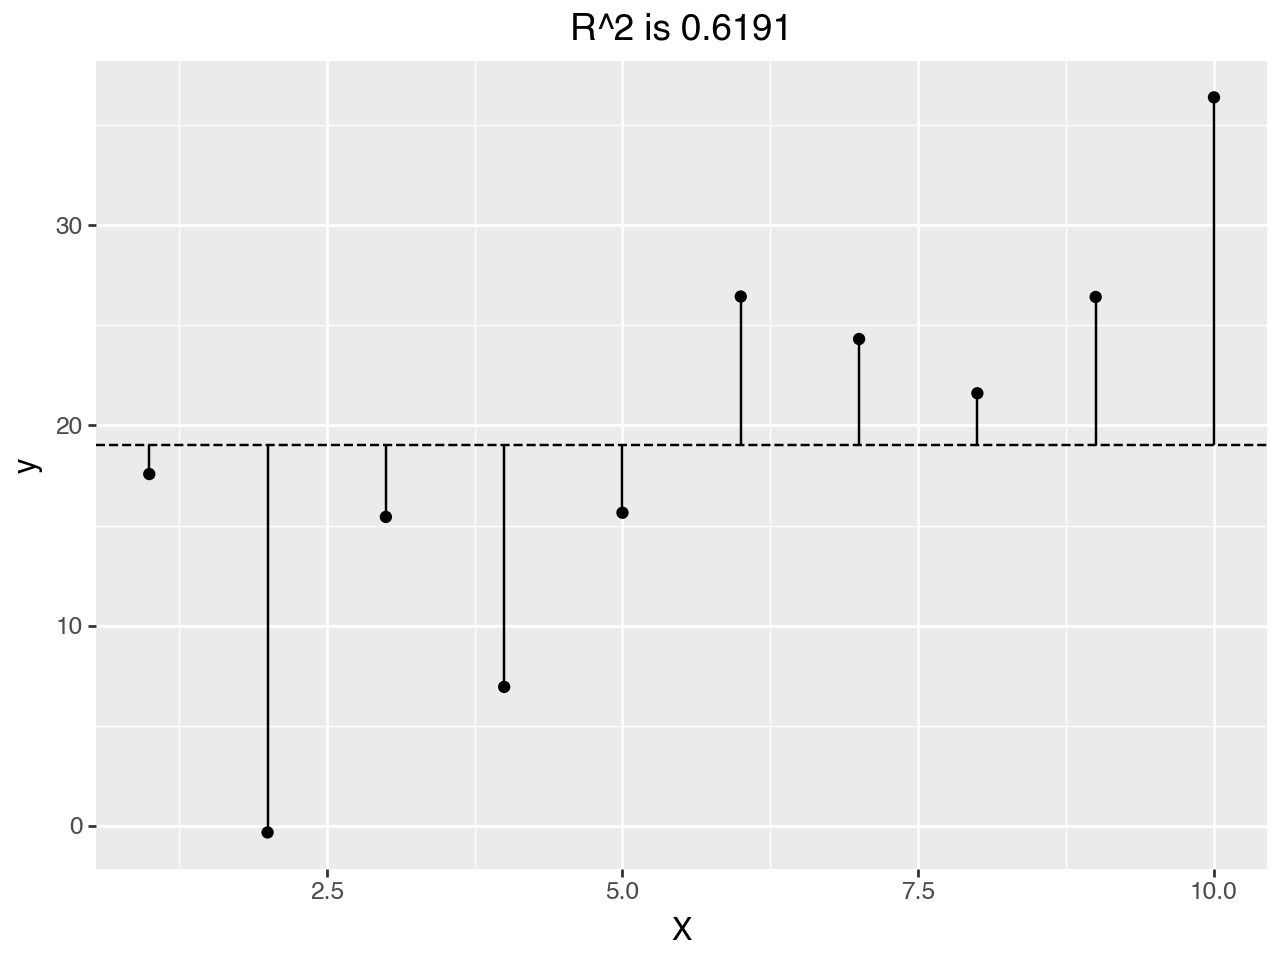

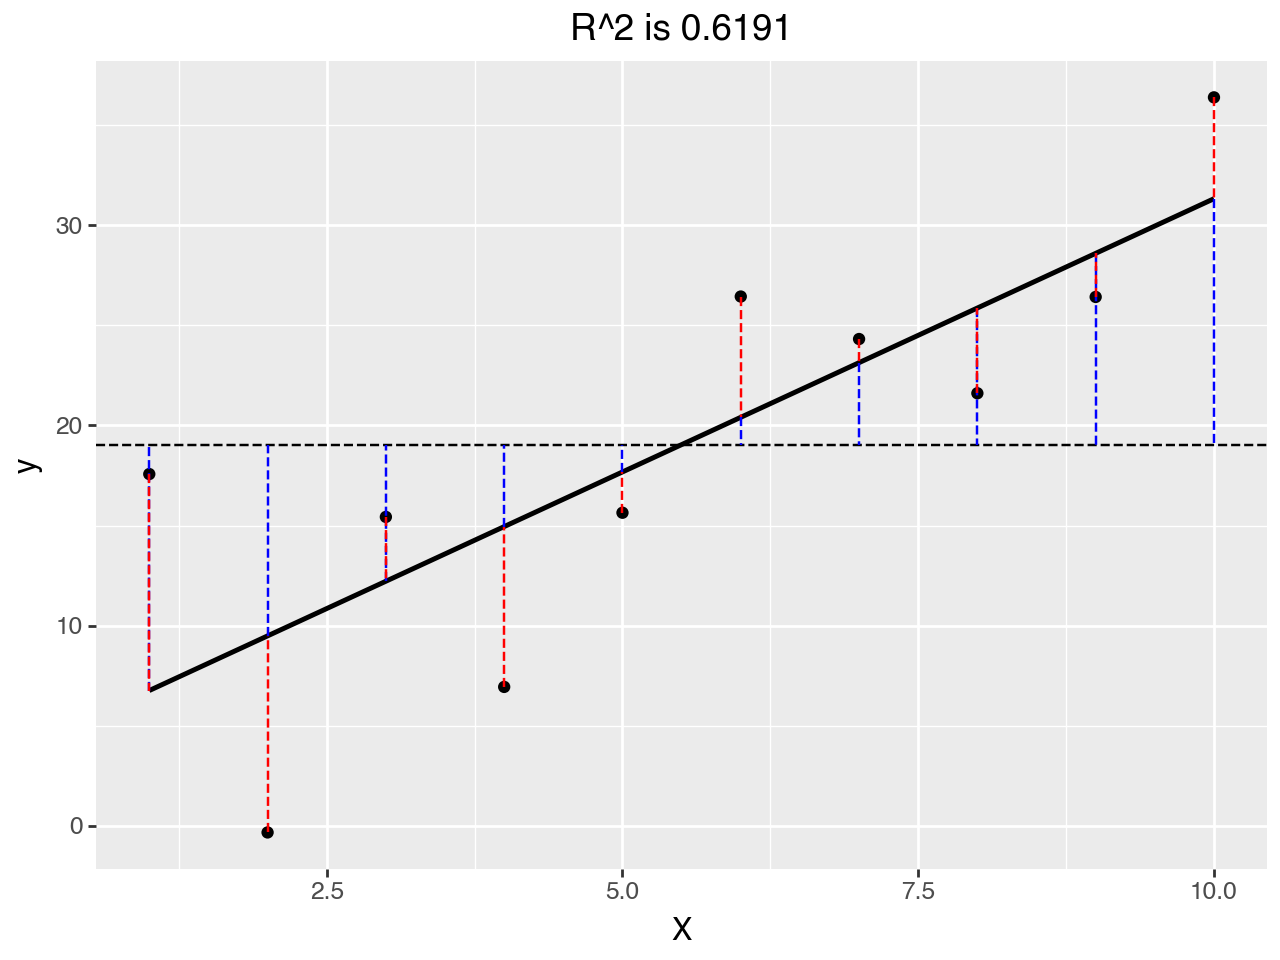

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 3
Sample Size: 100
SST (Total Sum of Squares): 764606.517
SSR (Regression Sum of Squares): 762280.8401
SSE (Error Sum of Squares): 2325.6769
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.997
F-statistic: 32121.195480679195
p-value: 1.1102230246251565e-16
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


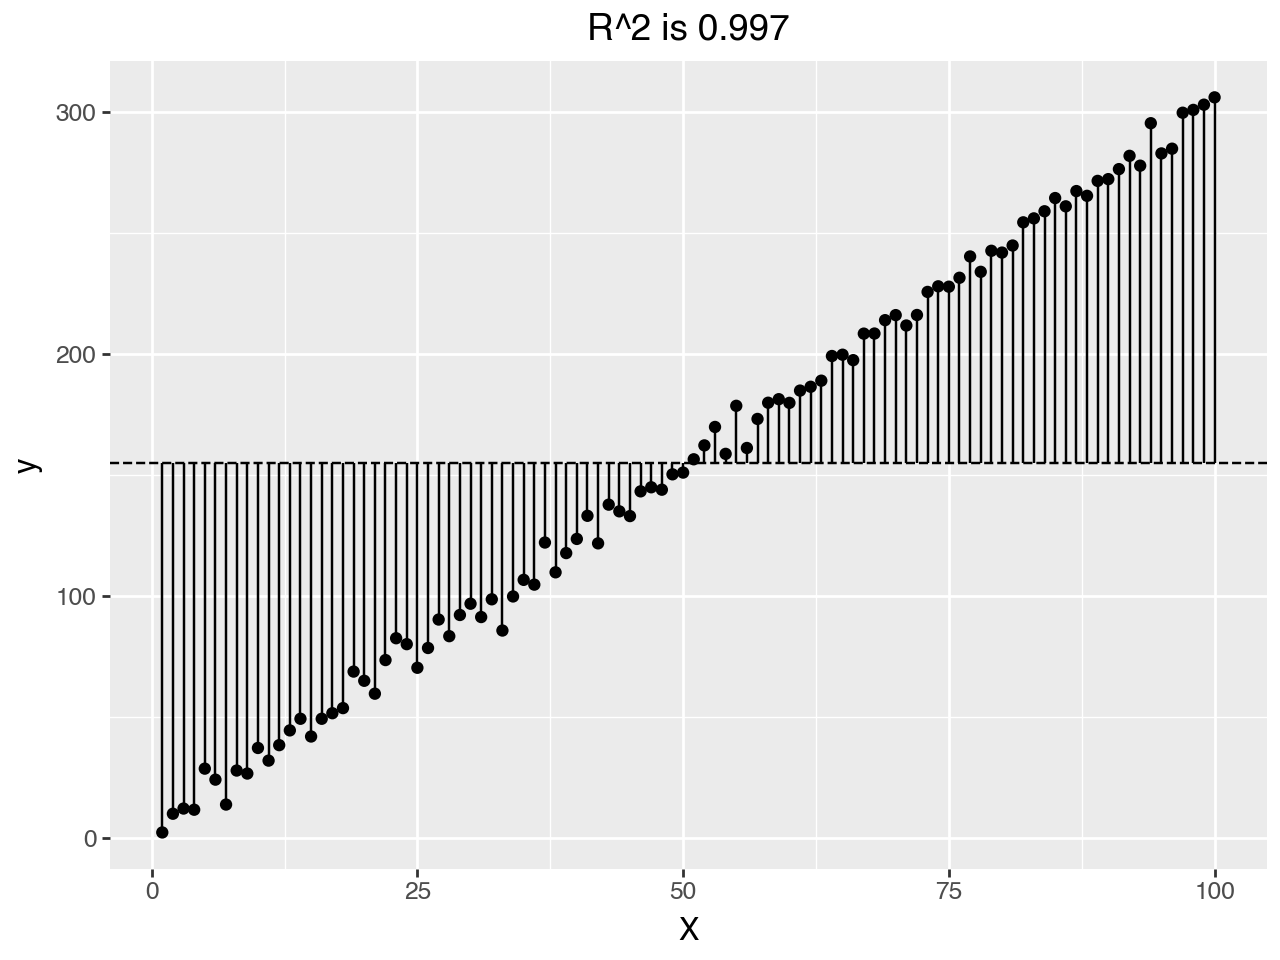

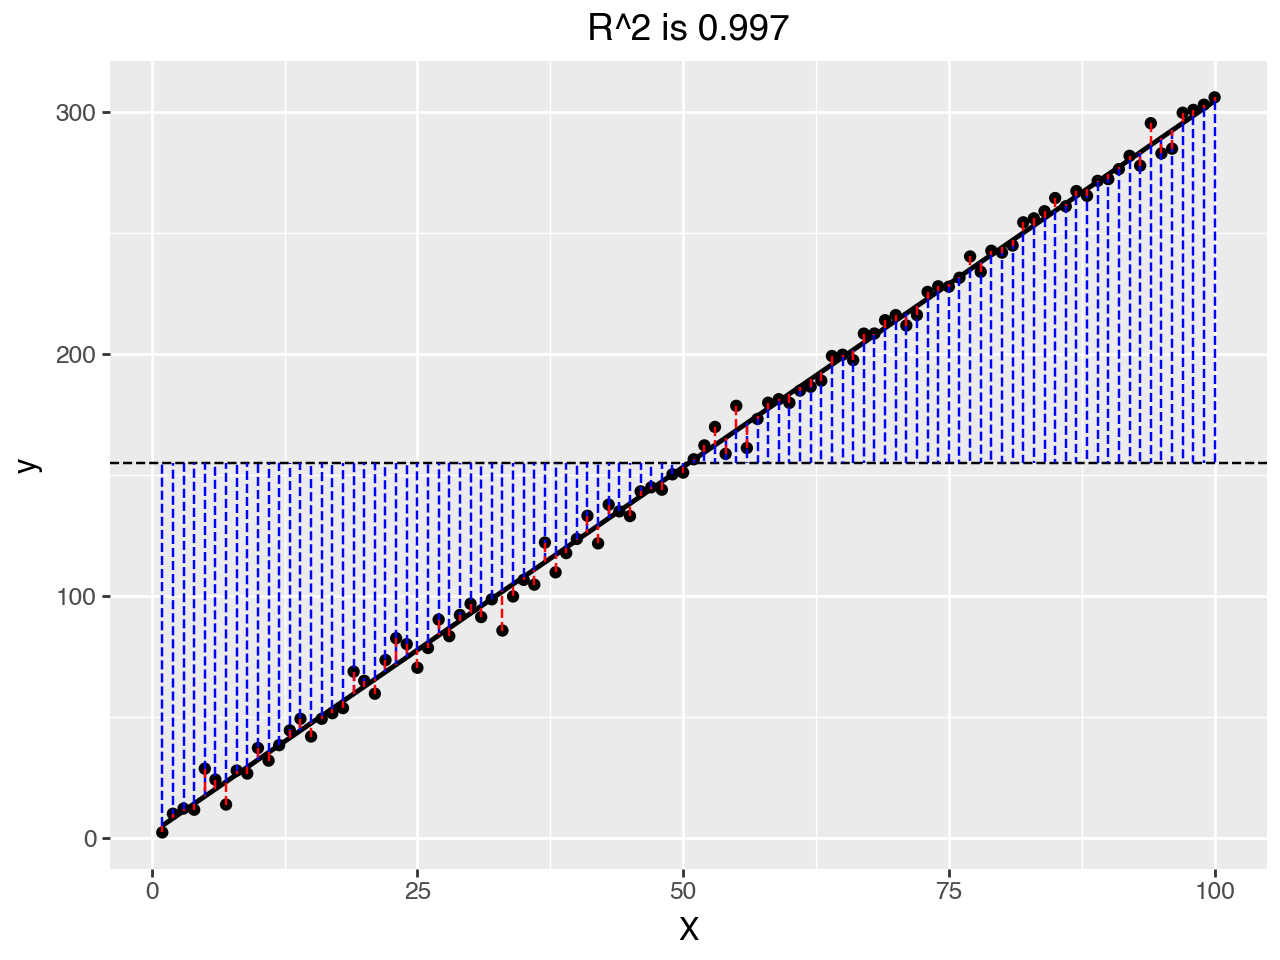

alpha: 0.05
sigma: 5
Slope: 3
Intercept: 3
Sample Size: 1000
SST (Total Sum of Squares): 750384761.9715
SSR (Regression Sum of Squares): 750360325.5329
SSE (Error Sum of Squares): 24436.4385
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 1.0
F-statistic: 30645202.445595097
p-value: 1.1102230246251565e-16
Reject the null hypothesis at alpha = 0.05. There is evidence of a linear relationship.


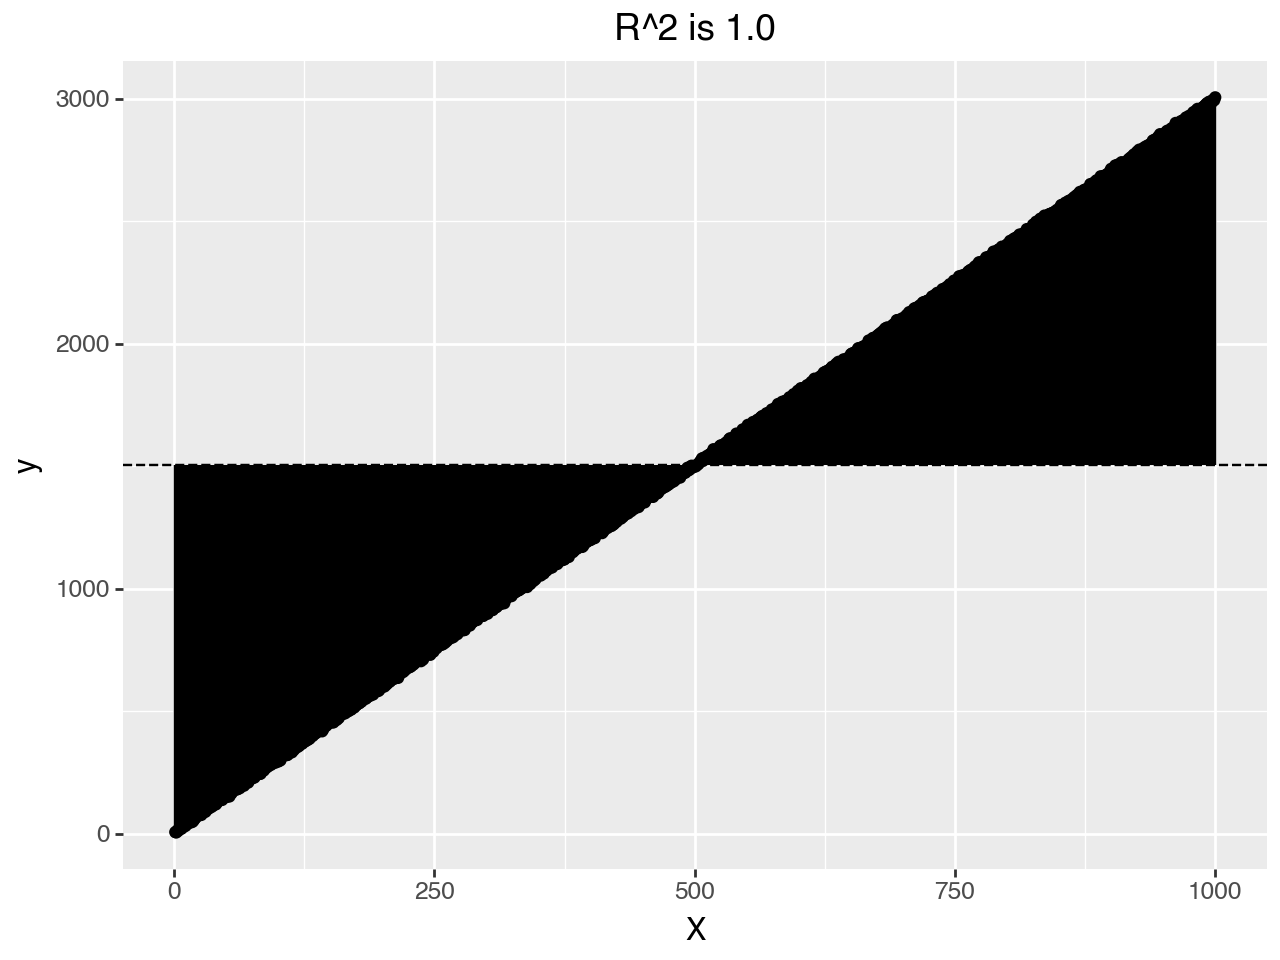

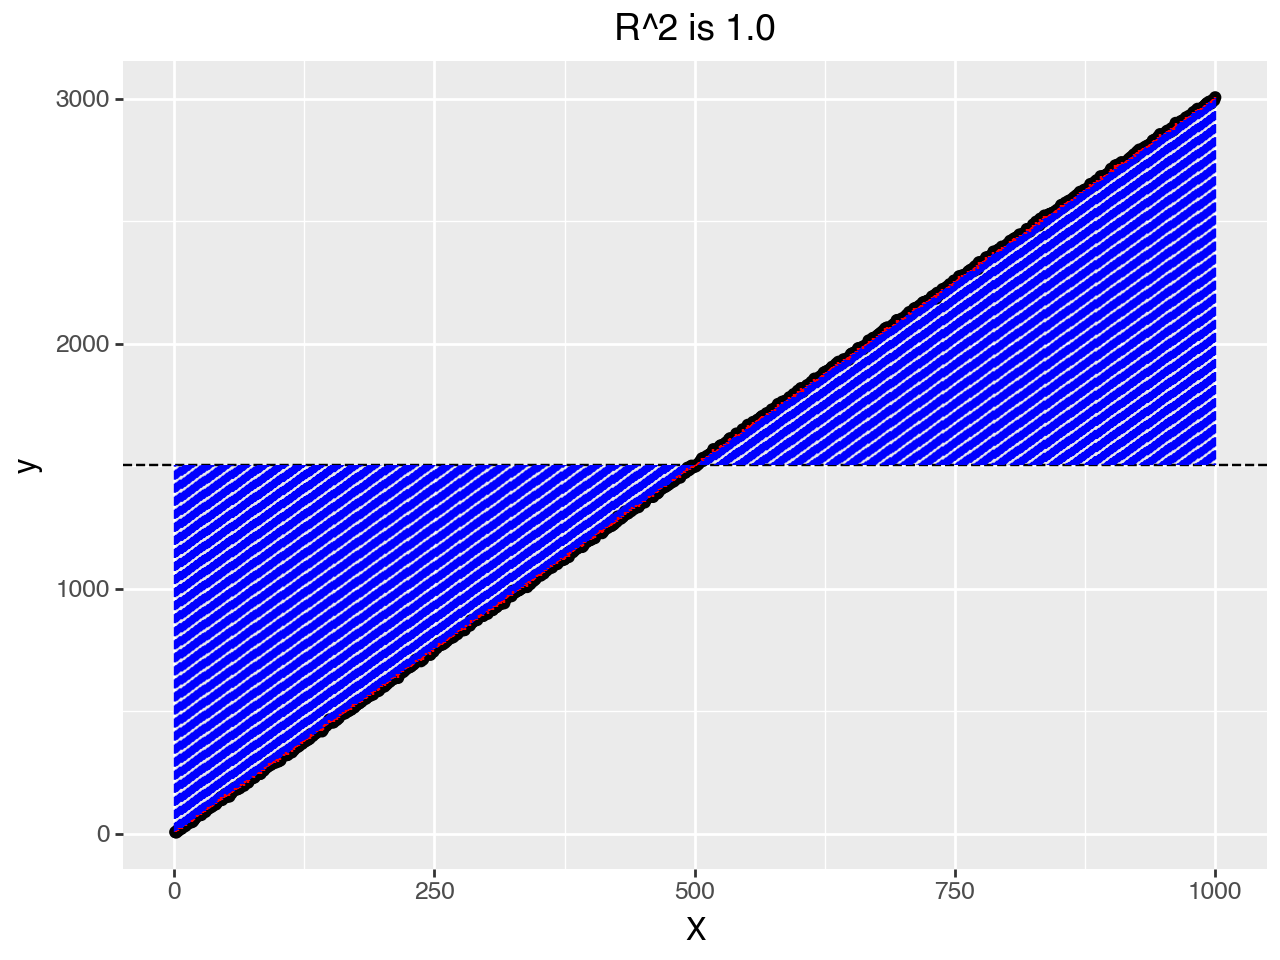


 ----------------- 



In [8]:
alpha = 0.05
sigma = 5
beta1 = 3
beta0 = 3
n = 10
for i in range(1, 4):
    n = 10**i #iterate sample size from 10 to 1000
    X, y = generate_data(sigma = sigma, beta0=beta0, beta1=beta1, sample_size=n)
    if show_prints:
        print(f"alpha: {alpha}")
        print(f"sigma: {sigma}")
        print(f"Slope: {beta1}")
        print(f"Intercept: {beta0}")
        print(f"Sample Size: {n}")
    gg1, gg2, F_stat = ss_decomp(X, y)
    hypothesis_test(F_stat=F_stat, n=n, alpha=0.05)

    if show_plots:
        gg1.show()
        gg2.show()
if show_prints:
    print("\n ----------------- \n")


6. Write a function which calculates the t-statistic for testing whether the true slope is zero or not. For each simulation you run, calculate both the t-stat and the F-stat. Repeat this $B=$100$ times, then plot the ordered pairs $\{(t_b, F_b)\}_{b=1}^B$ as a scatter plot. What relationship do you observe between them? Can you prove this relation?

<div style="background-color: #d0f0c0; color: #000000; padding: 10px; border-radius: 5px;">
It looks like there is an exponential relationship between the F and t statistics.
  
  I showed it in code that F is apporox t^2 for each value.

I didn't try to prove it mathematically but with some googling I found -
  https://stats.stackexchange.com/questions/55236/prove-f-test-is-equal-to-t-test-squared
</div>

In [9]:
from scipy.stats import t

def t_statistic_slope(X, y):
    model = LinearRegression()
    model.fit(X, y)

    n = len(y)

    y_pred = model.predict(X) 

    X_mean = np.mean(X)

    SSX = np.sum((X - X_mean) ** 2).round(4)

    residual_variance = np.sum((y - y_pred) ** 2).round(4) / (n - 2)

    se = np.sqrt(residual_variance / SSX)

    beta1_hat = model.coef_[0]

    t_stat = beta1_hat / se

    if show_prints:
        print(f"SSX (Sum of Squares of X): {SSX}")
        print(f"t_statistic: {t_stat}")

    df = n - 2

    p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))

    return t_stat, p_value


SSX (Sum of Squares of X): 82.5
t_statistic: 5.863878674755324
SST (Total Sum of Squares): 435.1781
SSR (Regression Sum of Squares): 353.0401
SSE (Error Sum of Squares): 82.138
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8113
SSX (Sum of Squares of X): 82.5
t_statistic: 3.3754123955606397
SST (Total Sum of Squares): 720.7412
SSR (Regression Sum of Squares): 423.4274
SSE (Error Sum of Squares): 297.3139
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.5875
SSX (Sum of Squares of X): 82.5
t_statistic: 4.996962413460955
SST (Total Sum of Squares): 1140.1851
SSR (Regression Sum of Squares): 863.522
SSE (Error Sum of Squares): 276.6631
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.7574
SSX (Sum of Squares of X): 82.5
t_statistic: 6.876162620337111
SST (Total Sum of Squares): 570.2125
SSR (Regression Sum of Squares): 487.6951
SSE (Error Sum of Squares): 82.5175
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8553
SSX (Sum of Square

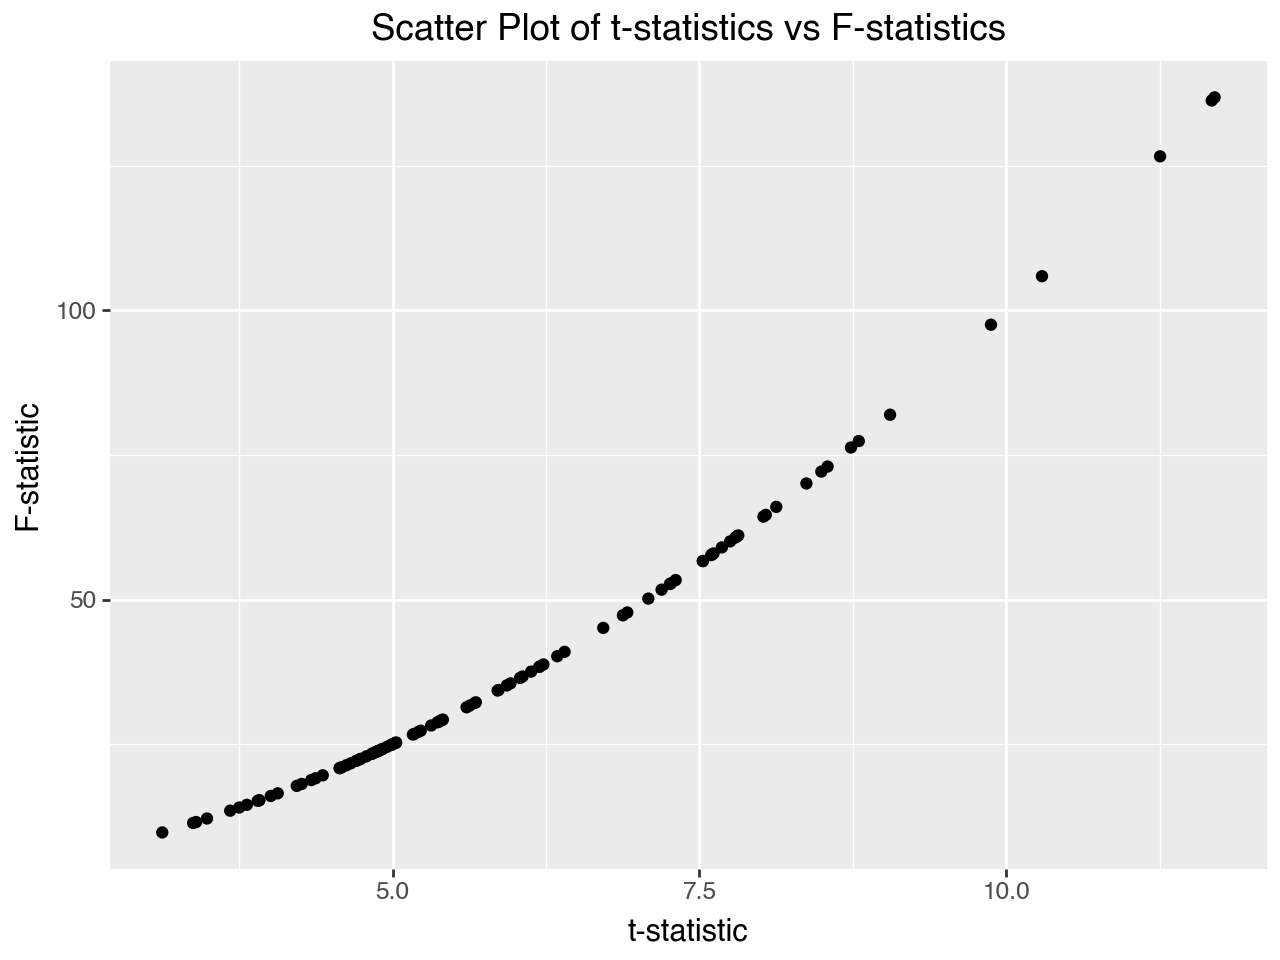

F = t^2 for all rows?
True


In [10]:
alpha = 0.05
sigma = 5
beta1 = 3
beta0 = 3
n = 10

list1 = []
flag1 = True
for i in range(1, 101):
    X, y = generate_data(sigma=sigma, beta0=beta0, beta1=beta1, sample_size=n)
    t_stat, _ = t_statistic_slope(X, y)
    _, _, F_stat = ss_decomp(X, y)
    list1.append({'t_stat': t_stat, 'F_stat': F_stat})
    #Lets show F = t^2
    flag1 = np.isclose(t_stat**2, F_stat)

df2 = pd.DataFrame(list1)

gg3 = (
    ggplot(df2, aes(x='t_stat', y='F_stat')) +
    geom_point() +
    ggtitle('Scatter Plot of t-statistics vs F-statistics') +
    xlab('t-statistic') +
    ylab('F-statistic')
)

gg3.show()

print(f"F = t^2 for all rows?\n{flag1}")
